---
title: "DATA471: 2020 Student Visa Deviations"
author: Kim Downing (300 639 199)
date: 2023-10-23
echo: false
include: false
bibliography: refs.bib
csl: vancouver.csl
---

Original members for group 15 were Izzy Bremner, Tram Chau, Kim Downing and Amish Verma.

In [843]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [844]:
# #| include: True
# from IPython.display import HTML
# HTML(pd.DataFrame({"Original Group Members":['Izzy Bremner', 'Tram Chau', 'Kim Downing', 'Amish Verma'],
#               "Student ID":['300 487 890', '300 643 163', '300 639 199', '300 598 733']}).to_html(index=False))

In [845]:
# taken from: https://www.stats.govt.nz/experimental/covid-19-data-portal on 2023-09-09
df_raw = pd.read_excel("data/covid_19_data_portal.xlsx",
                       sheet_name='data')
df_raw = df_raw[["ResourceID", "Period", "Label1", "Value", "Unit", "Measure"]]

In [846]:
df_raw.groupby('ResourceID').agg(['min'])

,Period,Label1,Value,Unit,Measure
,min,min,min,min,min
ResourceID,,,,,
CPACT12,2004-01-31,NZAC component - Card transaction spend,-75.26,%,Annual percentage change
CPTRA1,2016-01-01,New Zealand passport,0.00,Number,Border crossings - arrivals
CPVIS1,2015-01-31,Dependant,15.00,Number,People on a student visa
CPVIS2,2015-01-31,Essential skills,2073.00,Number,People on a work visa


In [1098]:
def process_df(df, resource, label, val_name):
    df['Period'] = pd.to_datetime(df['Period'])
    return df.query('ResourceID == @resource & Label1 == @label')\
                .rename({'Value':val_name}, axis=1)\
                .drop(["ResourceID", "Label1", "Unit", "Measure"], axis=1)\
                .set_index("Period")\
                .copy()

border_df_daily = process_df(df_raw, "CPTRA1", "Total", "border_arrivals") # daily
border_df = border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals']\
                            .agg(['sum', len, 'mean', 'min', 'max']) # monthly
border_df = border_df.rename({"sum":"total_border",
                                "len":"n_days",
                                "mean":"mean_border",
                                "min":"min_border",
                                "max":"max_border"}, axis=1)

activ_df = process_df(df_raw, "CPACT12", "New Zealand Activity Index (NZAC)", "activity") # monthly
stu_df = process_df(df_raw, "CPVIS1", "Fee paying", "student_visas") # monthly
work_df = process_df(df_raw, "CPVIS2", "Total", "work_visas") # monthly

df = border_df.join(activ_df).join(work_df).join(stu_df).dropna()
df_trunc = df.query('Period < "2020"')

In [1189]:
df2_t.shape

(46, 8)

In [1188]:
df.tail(12)

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2022-07-31,308022.0,31,9936.193548,7628.0,12275.0,0.5699,118647.0,17745.0
2022-08-31,310283.0,31,10009.129032,8530.0,11373.0,6.6014,109839.0,17676.0
2022-09-30,332709.0,30,11090.300000,9131.0,13494.0,4.8152,108300.0,18690.0
2022-10-31,378137.0,31,12197.967742,9606.0,15935.0,3.4907,111240.0,19695.0
2022-11-30,423495.0,30,14116.500000,12377.0,15816.0,1.2622,118386.0,17877.0
2022-12-31,504942.0,31,16288.451613,13504.0,19394.0,0.4080,115368.0,15990.0
2023-01-31,521524.0,31,16823.354839,5054.0,20531.0,0.9603,122424.0,20457.0
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0


In [1099]:
border_df_daily.describe()

,border_arrivals
count,2807.000000
mean,12759.820805
std,8102.351348
min,0.000000
25%,3045.500000
50%,15537.000000
75%,19001.000000
max,31612.000000


In [1100]:
activ_df

,activity
Period,
2004-01-31,4.1645
2004-02-29,4.2741
2004-03-31,5.8555
2004-04-30,6.4044
2004-05-31,5.8393
...,...
2023-03-31,1.4820
2023-04-30,0.9476
2023-05-31,0.8810


In [1101]:
border_df

,total_border,n_days,mean_border,min_border,max_border
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


<Axes: xlabel='Period'>

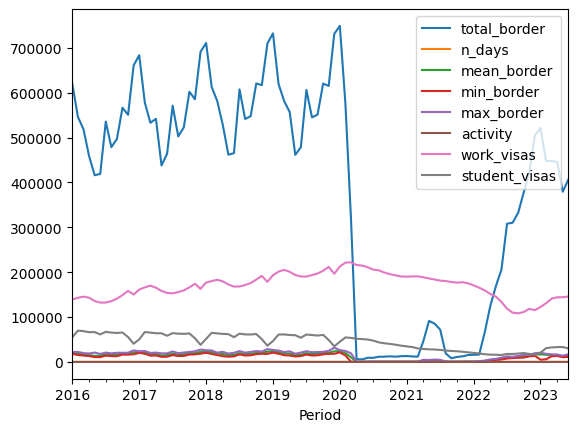

In [1102]:
df.plot()

In [1103]:
df.describe()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,385848.644444,30.422222,12688.128833,10107.833333,15450.200000,2.404609,169767.800000,45429.266667
std,245591.311144,0.834344,8074.821791,6995.711974,9400.945903,4.093974,28209.648699,17494.452495
min,5622.000000,28.000000,181.354839,0.000000,513.000000,-13.616500,108300.000000,15435.000000
25%,86837.250000,30.000000,2870.032258,674.500000,4923.750000,1.312900,146583.750000,30039.000000
50%,464733.000000,31.000000,15491.100000,12608.500000,19263.000000,2.219700,173404.500000,50493.000000
75%,574226.250000,31.000000,18759.483871,15389.250000,22253.500000,3.206800,190712.250000,61342.500000
max,748999.000000,31.000000,24161.258065,21076.000000,31612.000000,33.793400,222039.000000,69807.000000


In [1104]:
border_df_daily.groupby(pd.Grouper(freq='M'))['border_arrivals'].agg(['sum', len, 'mean', 'min', 'max']) # monthly

,sum,len,mean,min,max
Period,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0
...,...,...,...,...,...
2023-05-31,379405.0,31,12238.870968,10589.0,13873.0
2023-06-30,406391.0,30,13546.366667,11067.0,17005.0
2023-07-31,517796.0,31,16703.096774,13209.0,19874.0


In [1105]:
df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


In [1106]:
work_df.head(10)

,work_visas
Period,
2015-01-31,123504.0
2015-02-28,126324.0
2015-03-31,128370.0
2015-04-30,126129.0
2015-05-31,119424.0
2015-06-30,115965.0
2015-07-31,114624.0
2015-08-31,116472.0
2015-09-30,121068.0


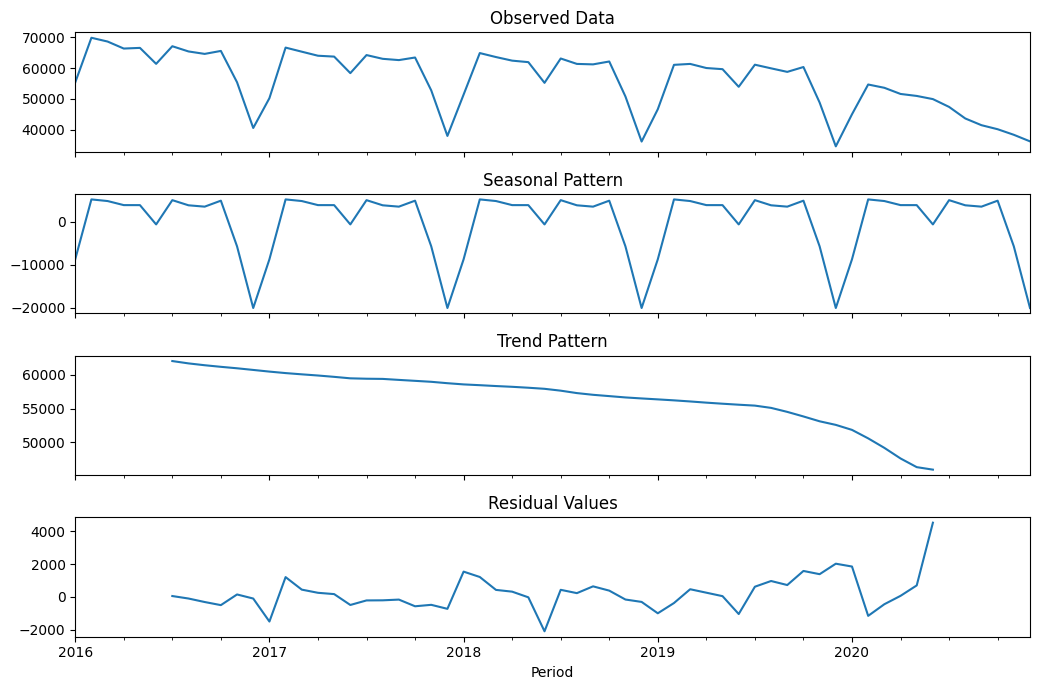

In [1209]:
from statsmodels.tsa.seasonal import seasonal_decompose as season

h_season = 7
f_season, ax_season = plt.subplots(nrows=4, ncols=1, 
                     figsize=(h_season*1.5, h_season),
                     sharex=True)
seasonal_decomp = season(df.loc['2016':'2020', 'student_visas'])
ax_season[0].set_title('Observed Data')
ax_season[1].set_title('Seasonal Pattern')
ax_season[2].set_title('Trend Pattern')
ax_season[3].set_title('Residual Values')
seasonal_decomp.observed.plot(ax=ax_season[0])
seasonal_decomp.seasonal.plot(ax=ax_season[1])
seasonal_decomp.trend.plot(ax=ax_season[2])
seasonal_decomp.resid.plot(ax=ax_season[3])
plt.tight_layout()
plt.show()

<Axes: xlabel='Period'>

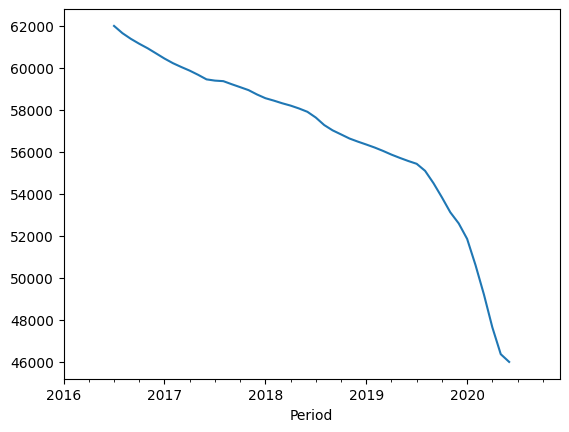

In [1201]:
seasonal_decomp.trend.plot()

<Axes: xlabel='Period'>

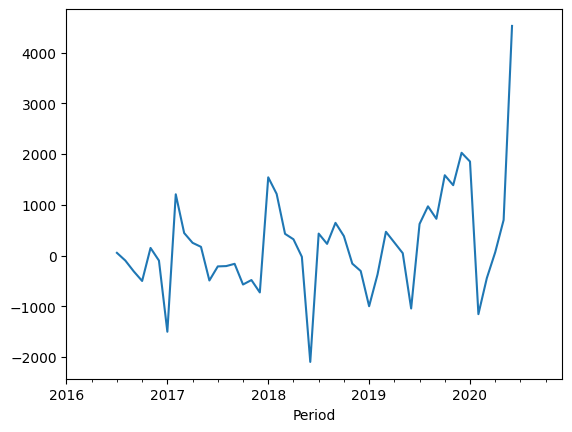

In [1202]:
seasonal_decomp.resid.plot()

<Axes: xlabel='Period'>

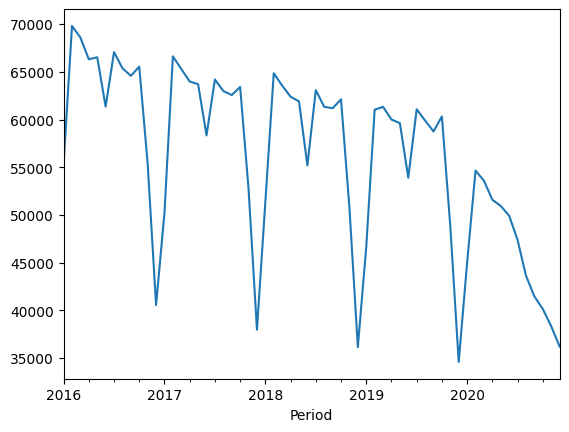

In [1203]:
seasonal_decomp.observed.plot()

In [1107]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [1108]:
def diff_n(df, n=1):
    df = df.copy()
    for i in range(n):
        df = df.diff().dropna()
    return df

def dft(series):
    return round(adfuller(series)[1], 5)

In [1247]:
dft_df = pd.DataFrame()
for i in df.columns:
    for j in range(3):
        dft_df.loc[i, j] = dft(diff_n(df[i], j))

dft_df
# we'll difference everything twice for simplicity

,0,1,2
total_border,0.29189,0.24490,0.00000
n_days,0.09044,0.00000,0.00000
mean_border,0.28806,0.02061,0.00000
min_border,0.54119,0.00000,0.00000
max_border,0.53686,0.00000,0.00000
activity,0.00000,0.00000,0.00000
work_visas,0.07327,0.54122,0.00031
student_visas,0.48119,0.77719,0.00000


In [1110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def xform_ts(df, scaler):
    df2 = diff_n(df.copy(), 2)
    df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
    return df2

df2_t = xform_ts(df_trunc, scaler)
#df2 = xform_ts(df, scaler)

In [1111]:
df_initial = df.iloc[:2, :] # bits which will be lost during diffing, needed to un-xform data
#df_initial_t = df_trunc.iloc[:2, :] # bits which will be lost during diffing, needed to un-xform data

def inv_diff(df, org, scaler):
    # assumes two differences
    # unscale the values
    df = df.copy()
    df[df.columns] = scaler.inverse_transform(df[df.columns])

    # undiff the data
    # add on the last NA value (DIFFERENCED), in this case from the second row as we difference twice to go from d2 => d1
    org_d1 = pd.DataFrame(org.diff().iloc[1]).T 
    df2 = pd.concat([org_d1, df])
    df2 = df2.cumsum()
    # add on the first NA value (RAW) to go from d1 => raw
    df2 = pd.concat([pd.DataFrame(org.iloc[0]).T, df2])
    df2 = df2.cumsum()
    return df2

In [1112]:
df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0
...,...,...,...,...,...,...,...,...
2023-02-28,448064.0,28,16002.285714,5876.0,18032.0,1.4768,130839.0,30705.0
2023-03-31,447713.0,31,14442.354839,12568.0,16910.0,1.4820,141033.0,32253.0
2023-04-30,446057.0,30,14868.566667,13271.0,16431.0,0.9476,144075.0,33051.0


<Axes: xlabel='Period'>

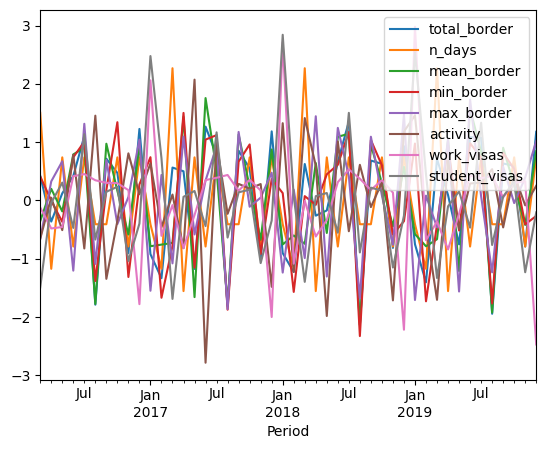

In [1113]:
df2_t.plot()

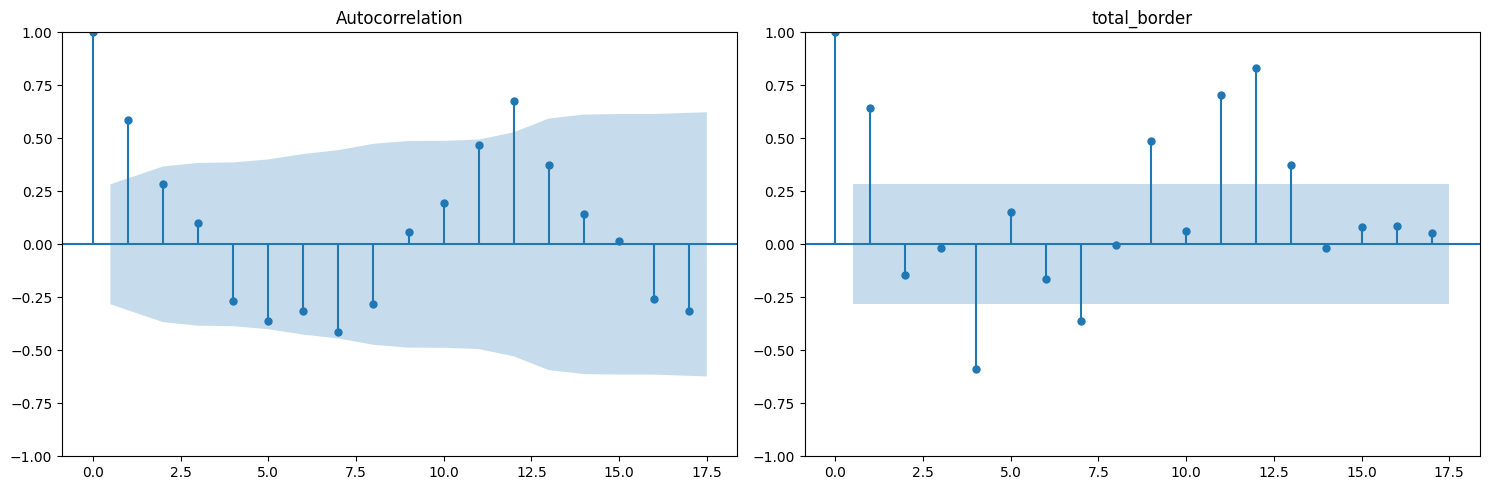

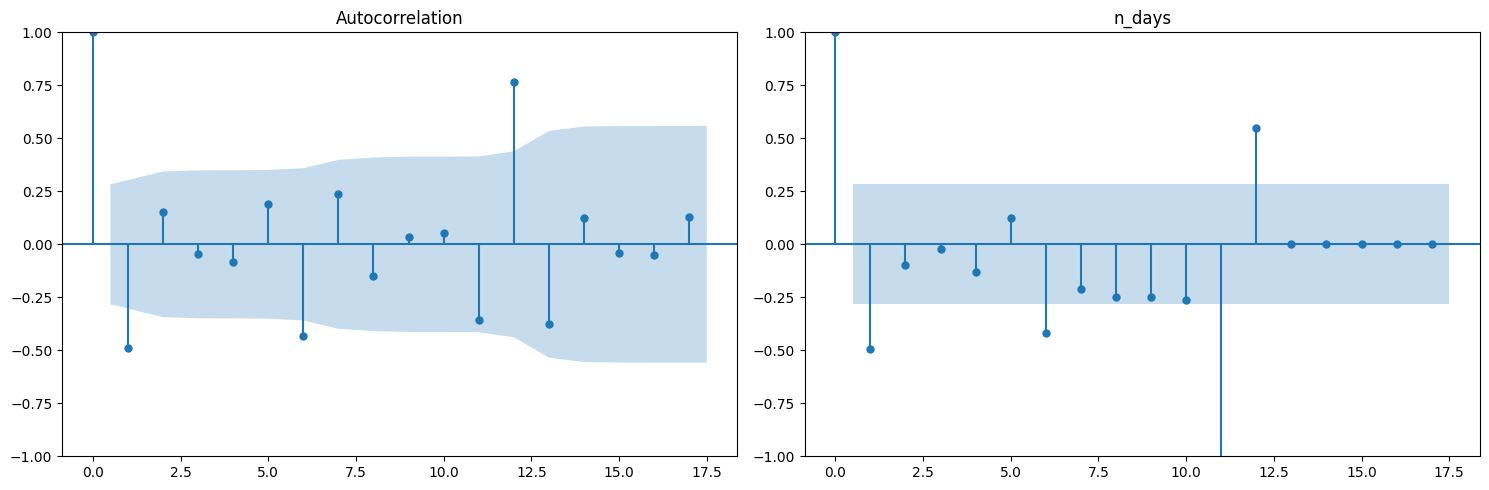

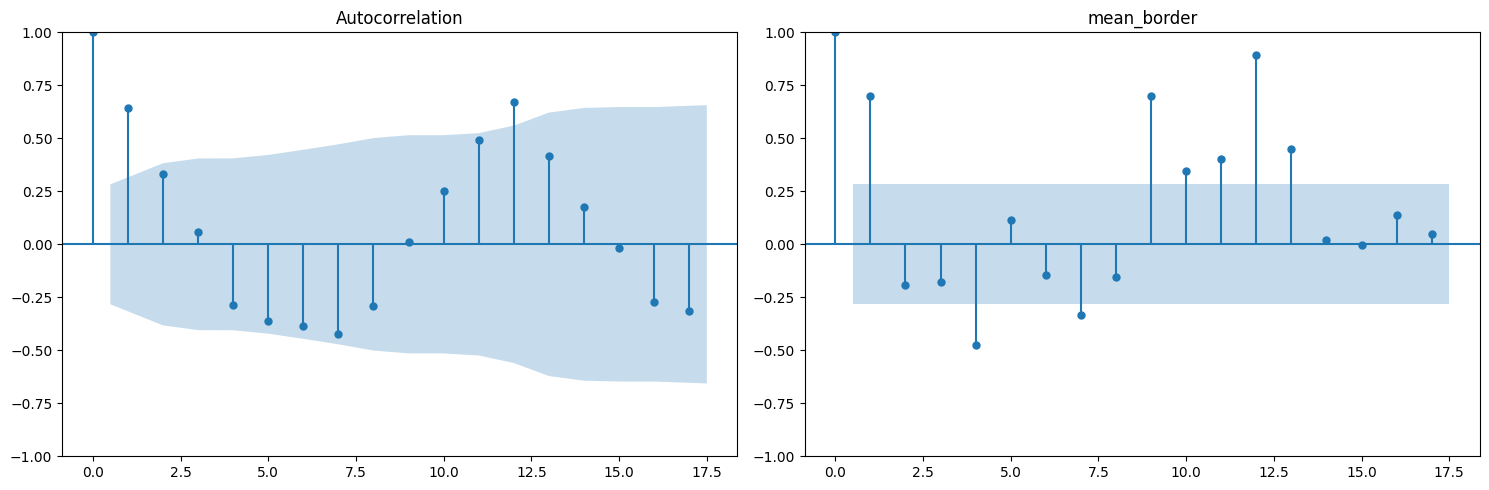

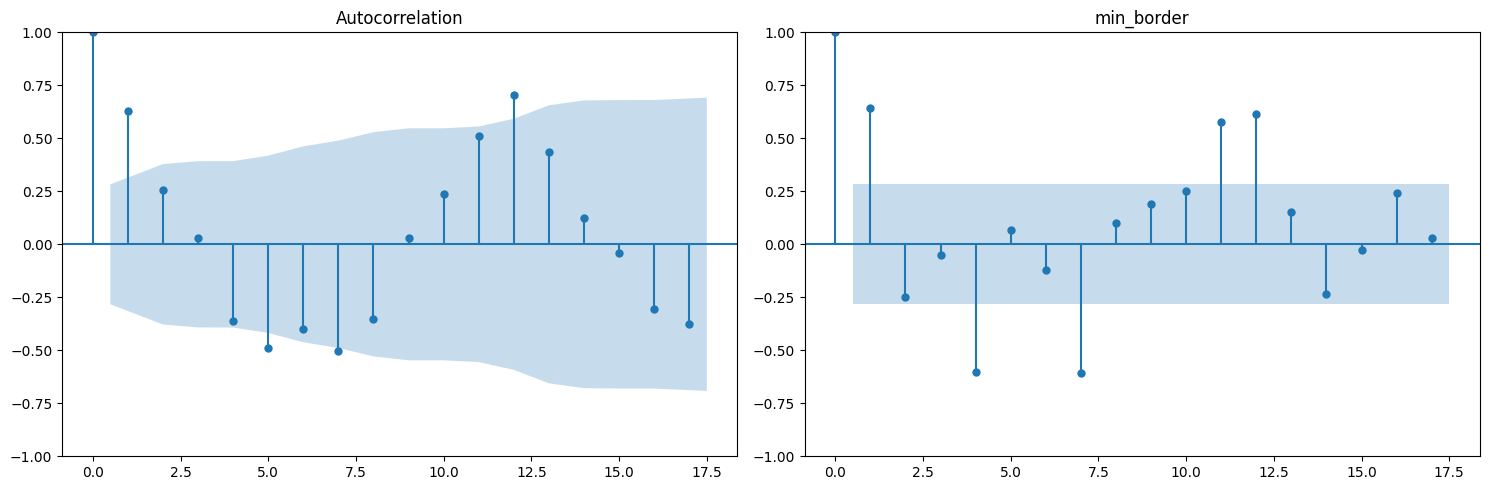

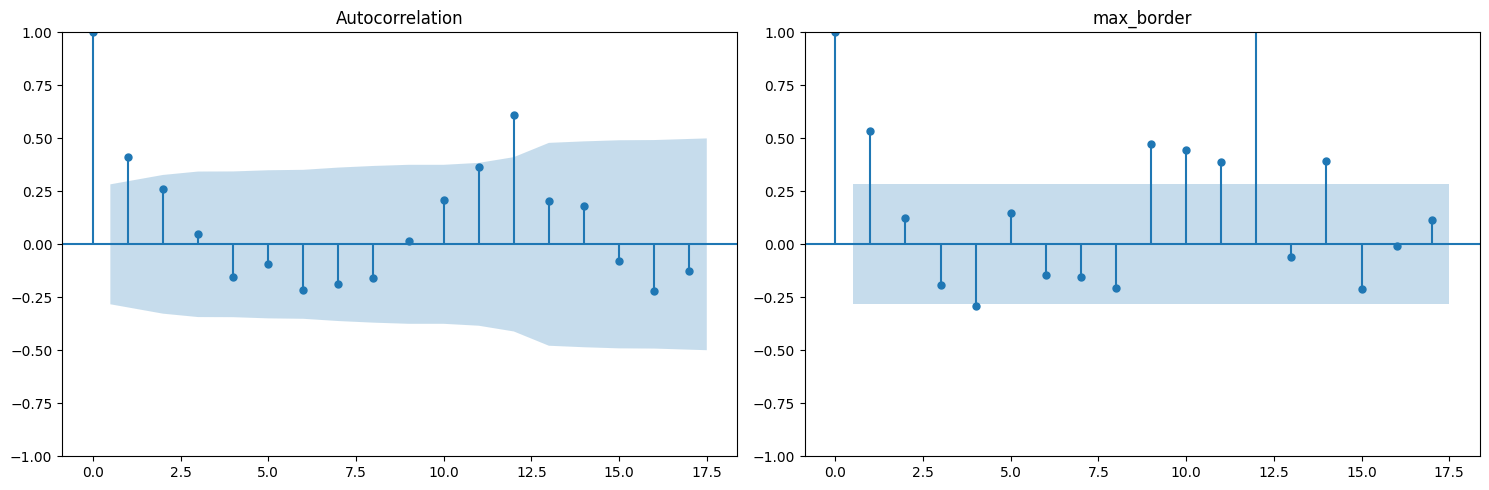

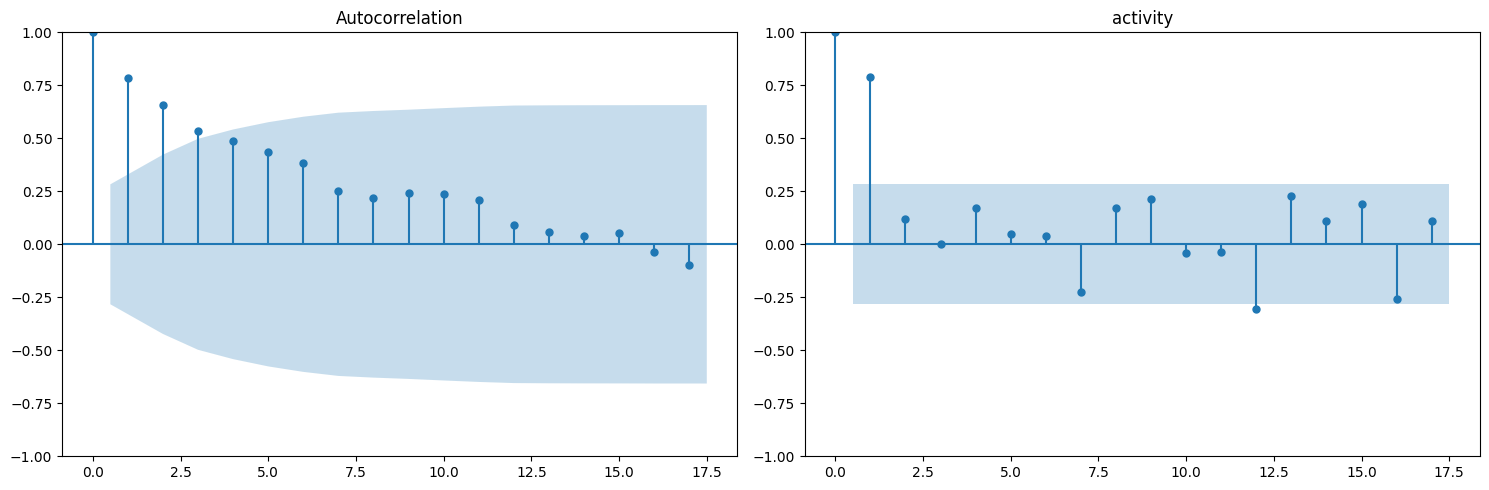

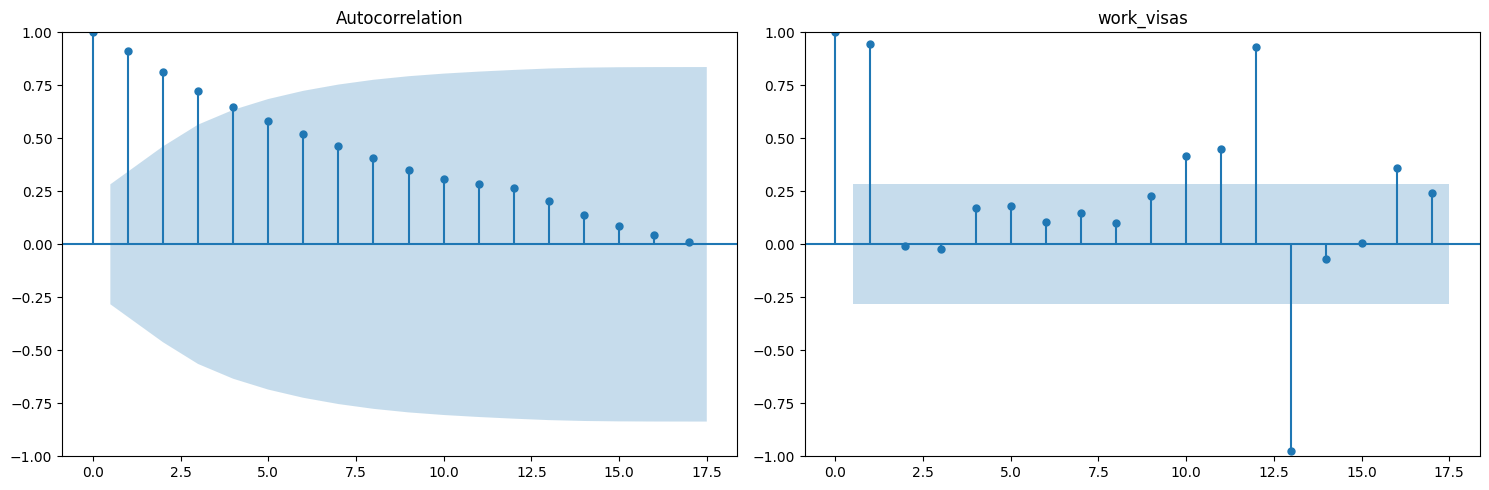

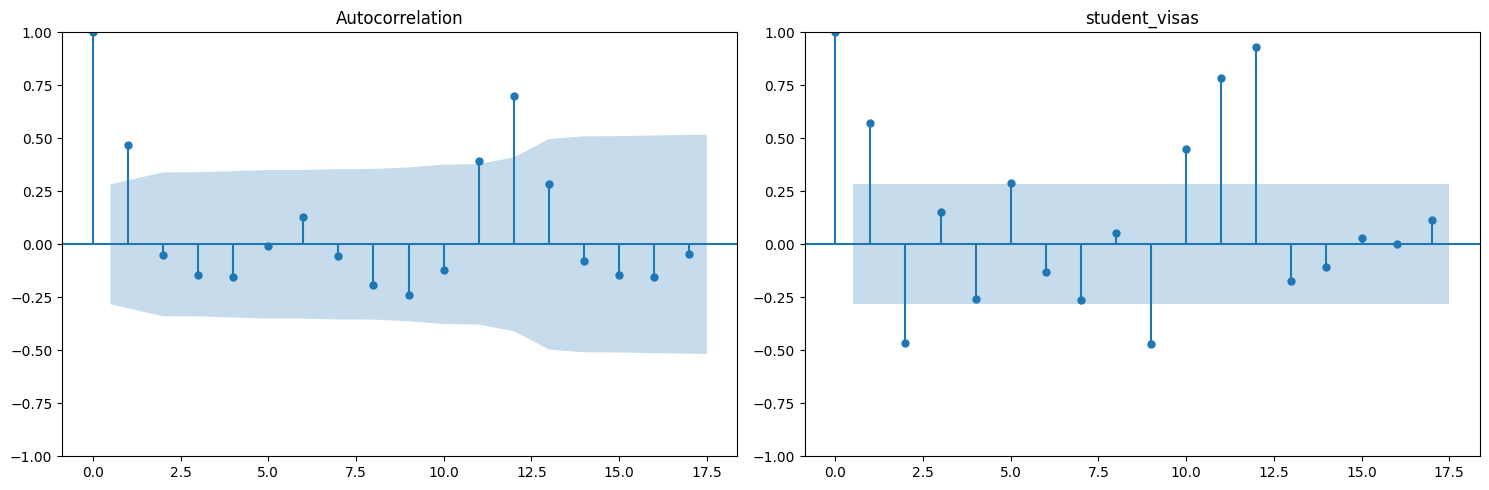

In [1114]:
for col in df_trunc.columns:
    h = 5
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(h*3, h))
    plot_acf(df_trunc[col], ax=ax[0])
    plot_pacf(df_trunc[col], ax=ax[1], method='ols')
    plt.title(label=f'{col}')
    plt.tight_layout()
    plt.show()

In [1115]:
df.columns

Index(['total_border', 'n_days', 'mean_border', 'min_border', 'max_border',
       'activity', 'work_visas', 'student_visas'],
      dtype='object')

In [1116]:
from statsmodels.tsa.stattools import grangercausalitytests as granger
import warnings
warnings.filterwarnings('ignore')

In [1117]:
?granger

Signature: granger(x, maxlag, addconst=True, verbose=None)
Docstring:
Four tests for granger non causality of 2 time series.

All four tests give similar results. `params_ftest` and `ssr_ftest` are
equivalent based on F test which is identical to lmtest:grangertest in R.

Parameters
----------
x : array_like
    The data for testing whether the time series in the second column Granger
    causes the time series in the first column. Missing values are not
    supported.
maxlag : {int, Iterable[int]}
    If an integer, computes the test for all lags up to maxlag. If an
    iterable, computes the tests only for the lags in maxlag.
addconst : bool
    Include a constant in the model.
verbose : bool
    Print results. Deprecated

    .. deprecated: 0.14

       verbose is deprecated and will be removed after 0.15 is released



Returns
-------
dict
    All test results, dictionary keys are the number of lags. For each
    lag the values are a tuple, with the first element a dictionary with


In [1118]:
testcol = 'student_visas'
for i in df.columns:
        if i != testcol:
            _ = granger(df[[testcol, i]], maxlag=4)
            print(f"{testcol}, {i}\n")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6056 , p=0.0006  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=13.0453 , p=0.0003  , df=1
likelihood ratio test: chi2=12.1735 , p=0.0005  , df=1
parameter F test:         F=12.6056 , p=0.0006  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8240  , p=0.0043  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=12.3496 , p=0.0021  , df=2
likelihood ratio test: chi2=11.5565 , p=0.0031  , df=2
parameter F test:         F=5.8240  , p=0.0043  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.2554  , p=0.0007  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=20.4084 , p=0.0001  , df=3
likelihood ratio test: chi2=18.3335 , p=0.0004  , df=3
parameter F test:         F=6.2554  , p=0.0007  , df_denom=80, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.8384  , p=0.0004  , df_d

In [1119]:
for i in df_trunc.columns:
    for j in df_trunc.columns:
        if i != j:
            _ = granger(df_trunc[[i, j]], maxlag=4)
            print(f"{i}, {j}\n")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9839  , p=0.3267  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=1.0510  , p=0.3053  , df=1
likelihood ratio test: chi2=1.0394  , p=0.3080  , df=1
parameter F test:         F=0.9839  , p=0.3267  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8214  , p=0.1746  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=4.0871  , p=0.1296  , df=2
likelihood ratio test: chi2=3.9156  , p=0.1412  , df=2
parameter F test:         F=1.8214  , p=0.1746  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5305  , p=0.0237  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=12.5424 , p=0.0057  , df=3
likelihood ratio test: chi2=11.0637 , p=0.0114  , df=3
parameter F test:         F=3.5305  , p=0.0237  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4606  , p=0.2351  , df_d

In [1120]:
# preds_df = pd.concat([df2_t.head(22), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=36, freq='M'),
#                                    columns=df2_t.columns)])
# preds_df

In [1121]:
# for i in mod_forecast[0]:
#     print(i)

In [1307]:
maxlag=4
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    # Taken from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = granger(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    return df

granger_matrix = grangers_causation_matrix(df2_t, variables = df2_t.columns) 

In [1123]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape

offset = 22
preds_df = pd.concat([df2_t.head(offset), 
                      pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
                                   columns=df2_t.columns)])
# preds_ci_lower = pd.concat([df2_t.head(offset), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
#                                    columns=df2_t.columns)])
# preds_ci_upper = pd.concat([df2_t.head(offset), 
#                       pd.DataFrame(index=pd.date_range('2018-01-31', periods=24, freq='M'),
#                                    columns=df2_t.columns)])

for i in range(len(df2_t)):
    if i < offset:
        continue
    train = preds_df.iloc[0:i, ]
    mod = VAR(train)
    mod_fit = mod.fit(maxlag)
    mod_forecast, t_ci_l, t_ci_u = mod_fit.forecast_interval(mod_fit.endog, steps=1)
    #print(t_ci_l[0], t_ci_u[0])
    for j in range(len(mod_forecast[0])):
        preds_df.iloc[i, j] = mod_forecast[0][j]
        #preds_ci_lower.iloc[i, j] = t_ci_l[0][j]
        #preds_ci_upper.iloc[i, j] = t_ci_u[0][j]

preds_df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927
2016-08-31,-1.786985,-0.407190,-1.774754,-1.381197,-1.088011,1.454752,0.347084,-0.669600
2016-09-30,0.716528,-0.407190,0.973406,0.179351,0.693967,-1.343725,0.302462,0.150149
2016-10-31,0.473049,0.739589,0.165348,1.342771,-0.404807,-0.349293,0.297120,0.235145
2016-11-30,-0.902022,-0.789449,-0.584159,-1.311958,0.059772,0.808625,0.177395,-1.037717
2016-12-31,1.227450,0.739589,0.945784,0.274888,1.043812,0.107549,-1.778113,-0.395955


In [1124]:
preds_inv_df = inv_diff(preds_df, df_initial, scaler)['2018':]
comp_inv_df = inv_diff(df2_t, df_initial, scaler)['2018':]

In [1316]:
preds_metrics = pd.DataFrame({'RMSE':np.NAN*len(df2_t),
                              'MAPE':np.NAN*len(df2_t)},
                              index=df2_t.columns)
preds_metrics

,RMSE,MAPE
total_border,NaN,NaN
n_days,NaN,NaN
mean_border,NaN,NaN
min_border,NaN,NaN
max_border,NaN,NaN
activity,NaN,NaN
work_visas,NaN,NaN
student_visas,NaN,NaN


In [1319]:
preds_metrics = pd.DataFrame({'RMSE':np.NAN*len(df2_t),
                              'MAPE':np.NAN*len(df2_t)},
                              index=df2_t.columns)

for col in preds_inv_df.columns:
    preds_metrics.loc[col, 'RMSE'] = np.sqrt(mse(preds_inv_df[col], comp_inv_df[col]))
    preds_metrics.loc[col, 'MAPE'] = mape(preds_inv_df[col], comp_inv_df[col])*100
    
preds_metrics

,RMSE,MAPE
total_border,70031.826804,11.946236
n_days,1.474606,3.648327
mean_border,2013.472120,10.304013
min_border,1598.728517,9.769545
max_border,5492.621240,16.020081
activity,2.224442,47.271926
work_visas,25079.079607,12.170554
student_visas,7071.016254,11.048536


In [1125]:
for col in preds_inv_df.columns:
    print("RMSE", col, np.sqrt(mse(preds_inv_df[col], comp_inv_df[col])))

RMSE total_border 70031.82680386418
RMSE n_days 1.4746057896468616
RMSE mean_border 2013.4721198004609
RMSE min_border 1598.7285172277925
RMSE max_border 5492.621240064735
RMSE activity 2.2244418445861727
RMSE work_visas 25079.07960668273
RMSE student_visas 7071.016253744139


In [1126]:
for col in preds_inv_df.columns:
    print("MAPE", col, mape(preds_inv_df[col], comp_inv_df[col])*100)

MAPE total_border 11.94623592123702
MAPE n_days 3.64832657156035
MAPE mean_border 10.304013034360429
MAPE min_border 9.769545277993224
MAPE max_border 16.020081470950544
MAPE activity 47.27192560297662
MAPE work_visas 12.17055440422272
MAPE student_visas 11.048535900831874


In [1127]:
mse(preds_inv_df, comp_inv_df)

702524396.0404874

In [1128]:
mape(preds_inv_df, comp_inv_df)*100

15.2724022730166

<Axes: >

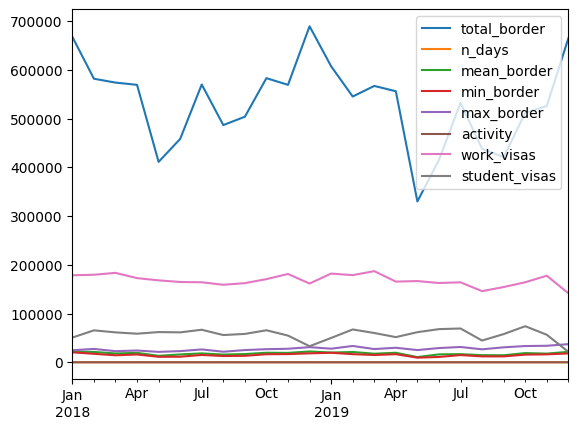

In [1129]:
preds_inv_df.plot()

In [1130]:
preds_inv_df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2018-01-31,668233.537763,30.634042,21745.566469,20468.821690,24646.598603,3.105356,178616.291467,50706.166648
2018-02-28,582196.521875,27.243341,21225.344946,17399.095296,27427.185457,3.820972,179710.317641,65567.289287
2018-03-31,574247.292505,31.655622,18104.741335,14387.590911,22800.561670,4.706340,183573.868317,61393.713736
2018-04-30,569627.678115,29.429041,19324.166516,16010.697620,24154.815010,3.693571,172802.284196,58682.316258
2018-05-31,411458.645101,30.881543,13283.816726,11255.298205,21356.058029,5.124874,168213.579183,62033.699649


In [1131]:
comp_inv_df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2018-01-31,710957.0,31.0,22934.096774,20334.0,25991.0,2.9747,176970.0,51378.0
2018-02-28,613052.0,28.0,21894.714286,17667.0,25438.0,2.1765,180273.0,64845.0
2018-03-31,581433.0,31.0,18755.903226,15285.0,20660.0,2.5170,183096.0,63552.0
2018-04-30,528093.0,30.0,17603.100000,12742.0,22425.0,3.3390,179601.0,62388.0
2018-05-31,461888.0,31.0,14899.612903,11610.0,18561.0,2.5630,172485.0,61902.0


In [1132]:
# ts_split = TimeSeriesSplit(n_splits=4)

# for train_index, test_index in ts_split.split(df_trunc):
#     train = df_trunc.iloc[train_index, :]
#     test = df_trunc.iloc[test_index, :]
#     mod = VAR(train)
#     mod_fit = mod.fit(4)
#     mod_forecast = mod_fit.forecast(mod_fit.endog, 6)
#     print(pd.DataFrame(mod_forecast), train)
#     break

In [1133]:
mod_res = pd.DataFrame(index=range(12),
                        columns=['aic', 'bic'])

ts_split = TimeSeriesSplit(n_splits=4)

for train_index, test_index in ts_split.split(df_trunc):
    train = df_trunc.iloc[train_index, :]
    test = df_trunc.iloc[test_index, :]
    # do something

for i in range(12):
    mod = VAR(df2_t)
    res = mod.fit(i)
    mod_res.loc[i, 'aic'] = res.aic
    mod_res.loc[i, 'bic'] = res.bic
    print(f"model {i}: {mod.select_order()}")

mod_res

model 0: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 1: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 2: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 3: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 4: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 5: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 6: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 7: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object.

,aic,bic
0,-10.068338,-9.750314
1,-16.651006,-13.760346
2,-23.345536,-17.830768
3,-29.303386,-21.111758
4,-47.601809,-36.679314
5,-inf,-inf
6,-520.32182,-503.770801
7,-523.639541,-504.188666
8,-517.063008,-494.653934
9,-511.589196,-486.162816


In [1134]:
# for i, (train_index, test_index) in enumerate(ts_split.split(df_trunc)):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

In [1526]:
from statsmodels.tsa.vector_ar.var_model import VAR
mod_res = pd.DataFrame(index=range(12),
                        columns=['aic', 'bic'])#, 'fpe', 'hqic'])

for i in range(13):
    mod = VAR(df2_t)
    res = mod.fit(i)
    mod_res.loc[i, 'aic'] = round(res.aic, 3)
    mod_res.loc[i, 'bic'] = round(res.bic, 3)
    #mod_res.loc[i, 'fpe'] = res.fpe
    #mod_res.loc[i, 'hqic'] = res.hqic
    print(f"model {i}: {mod.select_order()}")

lag_df = mod_res
mod_res

model 0: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 1: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 2: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 3: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 4: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 5: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 6: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 4, FPE -> 4, HQIC ->  4>
model 7: <statsmodels.tsa.vector_ar.var_model.LagOrderResults object.

,aic,bic
0,-10.068,-9.75
1,-16.651,-13.76
2,-23.346,-17.831
3,-29.303,-21.112
4,-47.602,-36.679
5,-inf,-inf
6,-520.322,-503.771
7,-523.64,-504.189
8,-517.063,-494.654
9,-511.589,-486.163


In [1136]:
mod1 = VAR(df2_t)
res1 = mod1.fit(maxlag)

In [1137]:
res1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Oct, 2023
Time:                     12:24:34
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -36.6793
Nobs:                     42.0000    HQIC:                  -43.5983
Log likelihood:           786.875    FPE:                1.71256e-19
AIC:                     -47.6018    Det(Omega_mle):     1.65634e-21
--------------------------------------------------------------------
Results for equation total_border
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.087913         0.080501            1.092           0.275
L1.total_border         -1.917735         5.938860           -0.323           0.747
L1.n_days                0.046878        

In [1138]:
preds = pd.DataFrame(res1.forecast(res1.endog, steps=12),
                    index=pd.date_range('2020-01-31', periods=12, freq='M'),
                    columns=df_trunc.columns)

In [1139]:
t_preds, t_ci_l, t_ci_u = res1.forecast_interval(res1.endog, steps=12)

In [1140]:
pd.DataFrame(t_ci_l)

,0,1,2,3,4,5,6,7
0,-1.311493,-0.372940,-1.249666,0.359328,-2.765748,-1.465567,2.805268,2.506734
1,-2.030145,-1.609109,-1.362282,-3.482614,0.443984,-0.627292,-1.167543,0.103163
2,0.814124,2.428019,-0.816883,-0.891282,-0.928679,-4.285172,-0.847096,-1.936662
3,-1.496195,-1.962778,-0.670662,-0.415814,-0.095754,-1.565561,-1.155068,-0.726472
4,-1.552753,0.279716,-2.153212,-2.334975,-1.838346,-5.510332,-1.349357,-0.034083
5,0.369530,-1.114970,0.623711,0.114493,0.651328,-3.124707,0.447815,-0.968555
6,-0.022218,-0.291751,-0.160768,-0.387225,-0.910714,-3.588312,-0.648873,0.715799
7,-3.146178,-0.519236,-3.621506,-3.713224,-2.039079,-2.676791,-0.487664,-1.544320
8,-0.637146,-1.566170,-0.230231,-0.883761,-0.704703,-4.057764,-0.602804,-0.528580
9,-0.321432,0.141573,-0.829853,-0.398972,-0.975088,-4.066502,-0.445419,0.079089


In [1141]:
pd.DataFrame(t_ci_u)

,0,1,2,3,4,5,6,7
0,-0.664212,-0.246445,-0.509410,1.751604,-2.279297,0.796580,3.128465,2.768457
1,-1.097076,-1.325206,-0.250250,-1.401472,1.437368,3.225110,-0.477045,0.733347
2,2.278926,2.823718,0.925506,1.635507,0.216143,1.254255,0.167531,-1.255966
3,0.293672,-1.469931,1.442342,2.186693,1.200225,5.005076,0.139037,0.177903
4,0.328596,1.016057,0.086910,0.363919,-0.347553,1.422559,-0.021607,0.896619
5,2.322955,-0.027163,2.899639,2.854176,2.364040,3.951355,1.826945,0.088770
6,2.032962,0.955468,2.158352,2.374026,0.989509,3.576926,0.862124,1.839517
7,-0.984959,0.818054,-1.215545,-0.861029,-0.094718,4.599734,1.099723,-0.229573
8,1.572724,-0.141160,2.226451,2.016283,1.346988,3.460328,1.011311,0.818442
9,1.926580,1.631103,1.660352,2.604680,1.224941,3.513924,1.193034,1.445975


In [1142]:
#pd.DataFrame([t_ci_l, t_preds, t_ci_u])

In [1143]:
res1.forecast(res1.endog, steps=12)

array([[-0.98785296, -0.30969266, -0.87953792,  1.05546612, -2.52252277,
        -0.33449311,  2.96686666,  2.63759591],
       [-1.56361008, -1.4671572 , -0.80626573, -2.44204268,  0.94067622,
         1.2989091 , -0.82229413,  0.4182549 ],
       [ 1.54652529,  2.62586816,  0.05431156,  0.37211228, -0.35626806,
        -1.51545844, -0.33978274, -1.59631425],
       [-0.60126124, -1.7163546 ,  0.38584009,  0.88543996,  0.55223565,
         1.71975786, -0.50801546, -0.2742847 ],
       [-0.61207821,  0.64788654, -1.03315091, -0.98552812, -1.09294969,
        -2.04388641, -0.68548225,  0.43126802],
       [ 1.34624218, -0.5710666 ,  1.76167532,  1.48433434,  1.50768367,
         0.41332426,  1.13737969, -0.4398929 ],
       [ 1.00537231,  0.33185853,  0.99879185,  0.99340054,  0.03939762,
        -0.0056928 ,  0.10662547,  1.27765831],
       [-2.06556839,  0.14940908, -2.41852524, -2.28712656, -1.06689855,
         0.96147148,  0.30602941, -0.88694692],
       [ 0.46778925, -0.85366497

In [1144]:
df2_t.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927


In [1145]:
full_df2_t = pd.concat([df2_t, preds])
raw_res = inv_diff(full_df2_t, df_initial, scaler)
scale_res = raw_res.copy()
raw_comp = scale_comp = df.query('Period < "2021"')
scale_comp = raw_comp.copy()

In [1146]:
scale_res[scale_res.columns] = scaler.transform(raw_res[raw_res.columns])
scale_comp[scale_comp.columns] = scaler.transform(raw_comp[raw_comp.columns])

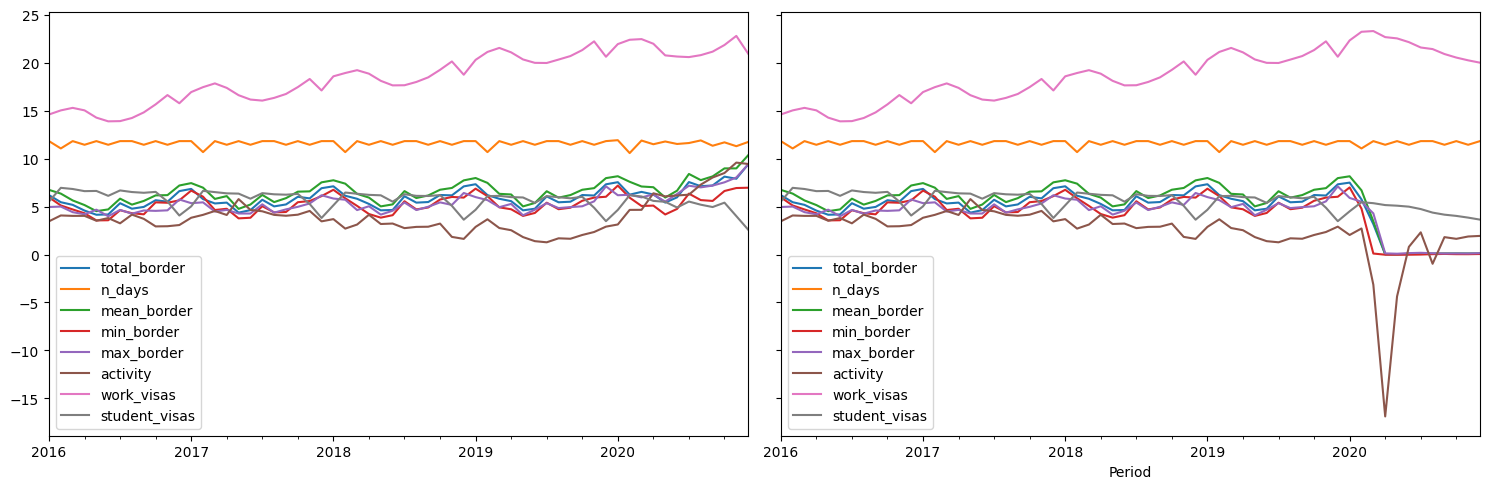

In [1147]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(h*3, h), sharey=True)
scale_res.plot(ax=ax[0])
scale_comp.plot(ax=ax[1])
plt.tight_layout()
plt.show()

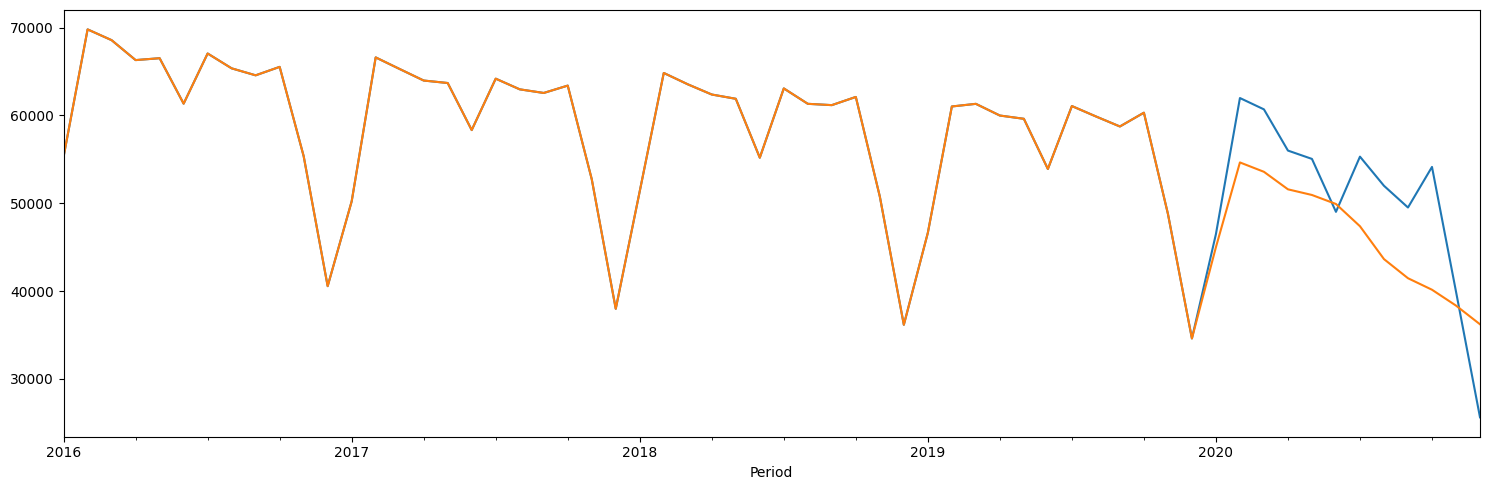

In [1148]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(h*3, h))
raw_res['student_visas'].plot(ax=ax)
raw_comp['student_visas'].plot(ax=ax)
plt.tight_layout()
plt.show()

In [1149]:
round((raw_res['student_visas'] - raw_comp['student_visas']).sum()) # lost this many paying students to Covid in 2020

52895

<Axes: >

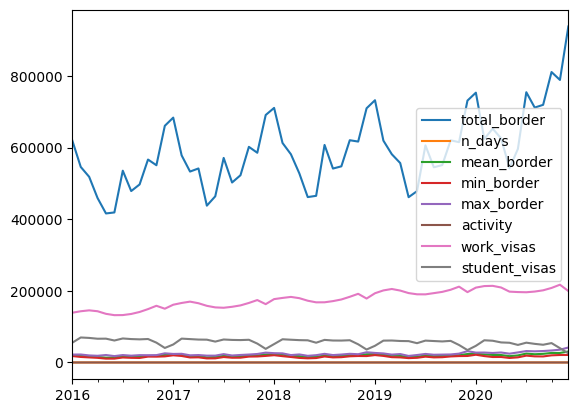

In [1150]:
raw_res.plot()

<Axes: xlabel='Period'>

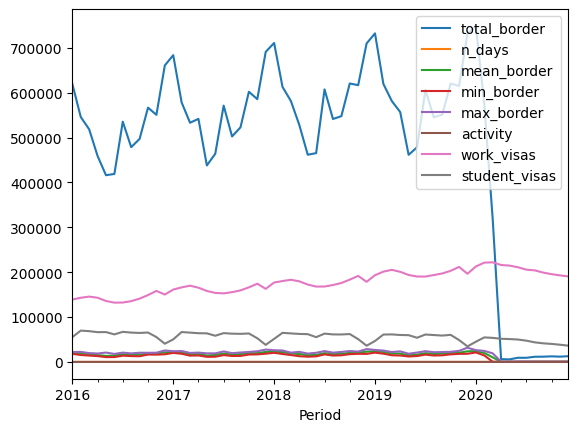

In [1151]:
raw_comp.plot()

<Axes: >

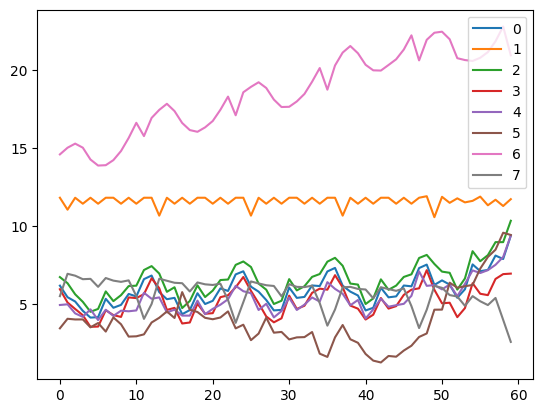

In [1152]:
pd.DataFrame(scaler.transform(raw_res)).plot()

<Axes: >

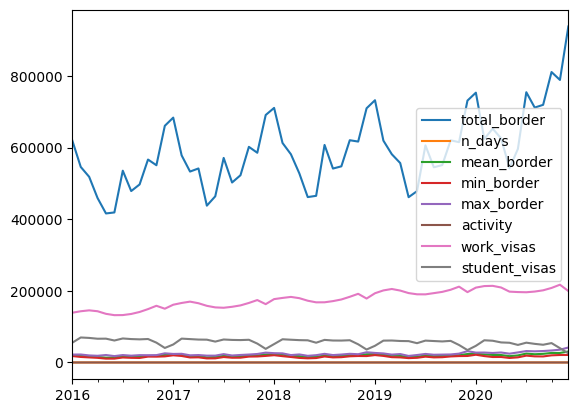

In [1153]:
raw_res.plot()

In [1154]:
df.head()

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
Period,,,,,,,,
2016-01-31,619487.0,31,19983.451613,17978.0,22083.0,2.7881,138975.0,55308.0
2016-02-29,546040.0,29,18828.965517,15424.0,22277.0,3.2814,143052.0,69807.0
2016-03-31,518523.0,31,16726.548387,14176.0,19697.0,3.2461,145572.0,68580.0
2016-04-30,459187.0,30,15306.233333,12978.0,18713.0,3.2482,143088.0,66309.0
2016-05-31,416186.0,31,13425.354839,10743.0,20850.0,2.8394,135846.0,66525.0


<Axes: xlabel='Period'>

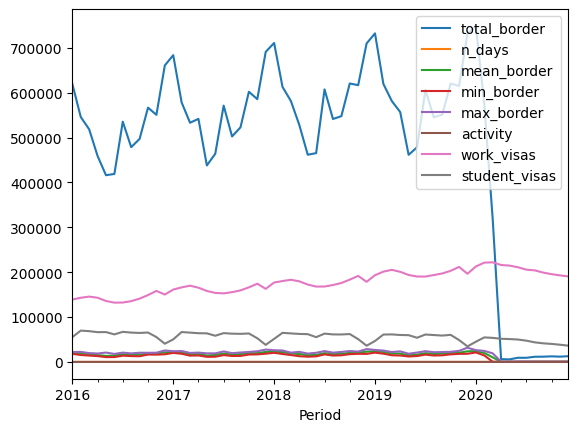

In [1155]:
df.query('Period < "2021"').plot()

<Axes: >

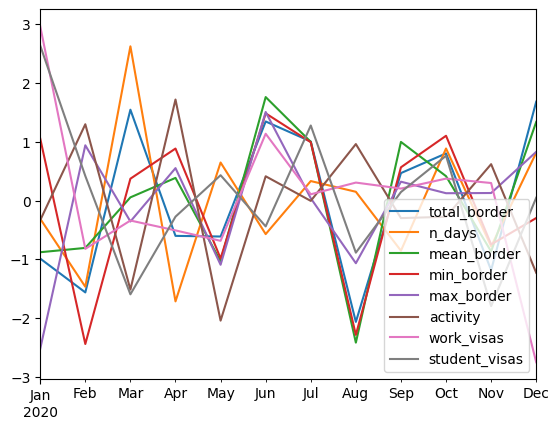

In [1156]:
preds.plot()

In [1157]:
#mod1.predict(start='2020-01-31', end='2020-12-31')

In [1158]:
model = VAR(endog=df_trunc)
model_fit = model.fit(maxlag)

# make prediction on validation
prediction = model_fit.forecast(model_fit.endog, steps=2)

prediction

array([[7.48834998e+05, 3.12638536e+01, 2.39860433e+04, 2.18393561e+04,
        2.73435197e+04, 1.36920629e+00, 2.10618249e+05, 4.65155048e+04],
       [6.26303643e+05, 2.78471764e+01, 2.24375331e+04, 1.82992903e+04,
        2.73176288e+04, 1.23345387e+00, 2.13162542e+05, 6.21018998e+04]])

In [1159]:
pd.date_range('2020-01-31', periods=2, freq='M')[1]

Timestamp('2020-02-29 00:00:00')

In [1160]:
pd.date_range('2020-01-31', periods=12, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [1161]:
pd.date_range('2023-06-30', periods=7, freq='M')[1:]

DatetimeIndex(['2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [1162]:
# for1 = pd.DataFrame(res1.forecast(df2.values[-8:], steps=6),
#                     columns=df.columns,
#                     index  =pd.date_range('2023-06-30', periods=7, freq='M')[1:])

In [1163]:
offset = len(df2_t)
preds2_df = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])
preds2_ci_lower = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])
preds2_ci_upper = pd.concat([df2_t, 
                      pd.DataFrame(index=pd.date_range('2020-01-31', periods=12, freq='M'),
                                   columns=df2_t.columns)])

for i in range(len(preds2_df)):
    if i < offset:
        continue
    train = preds2_df.iloc[0:i, ]
    mod = VAR(train)
    mod_fit = mod.fit(maxlag)
    mod_forecast, t_ci_l, t_ci_u = mod_fit.forecast_interval(mod_fit.endog, steps=1)
    for j in range(len(mod_forecast[0])):
        preds2_df.iloc[i, j] = mod_forecast[0][j]
        preds2_ci_lower.iloc[i, j] = t_ci_l[0][j]
        preds2_ci_upper.iloc[i, j] = t_ci_u[0][j]

preds2_df

,total_border,n_days,mean_border,min_border,max_border,activity,work_visas,student_visas
2016-03-31,0.420766,1.504109,-0.352508,0.414365,-0.659568,-0.654556,-0.118933,-1.490829
2016-04-30,-0.361704,-1.171709,0.199948,-0.003734,0.327408,0.047513,-0.479993,-0.041461
2016-05-31,0.122921,0.739589,-0.187328,-0.365576,0.671833,-0.508561,-0.454225,0.307110
2016-06-30,0.419669,-0.789449,0.789773,0.740256,-1.202970,0.784810,0.416216,-0.470882
2016-07-31,1.103360,0.739589,0.907053,1.009557,1.315513,-0.823127,0.453296,1.136927
2016-08-31,-1.786985,-0.407190,-1.774754,-1.381197,-1.088011,1.454752,0.347084,-0.669600
2016-09-30,0.716528,-0.407190,0.973406,0.179351,0.693967,-1.343725,0.302462,0.150149
2016-10-31,0.473049,0.739589,0.165348,1.342771,-0.404807,-0.349293,0.297120,0.235145
2016-11-30,-0.902022,-0.789449,-0.584159,-1.311958,0.059772,0.808625,0.177395,-1.037717
2016-12-31,1.227450,0.739589,0.945784,0.274888,1.043812,0.107549,-1.778113,-0.395955


<Axes: >

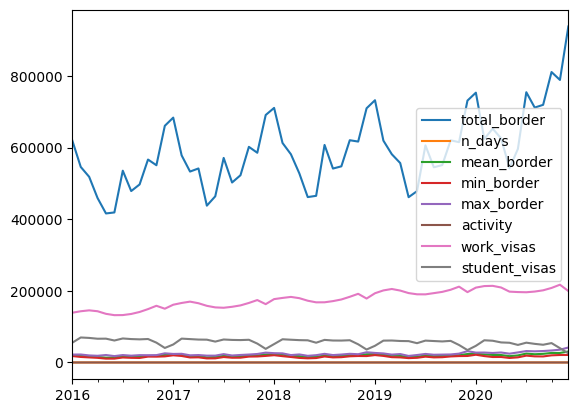

In [1164]:
final_preds = inv_diff(preds2_df, df_initial, scaler)
final_preds.plot()

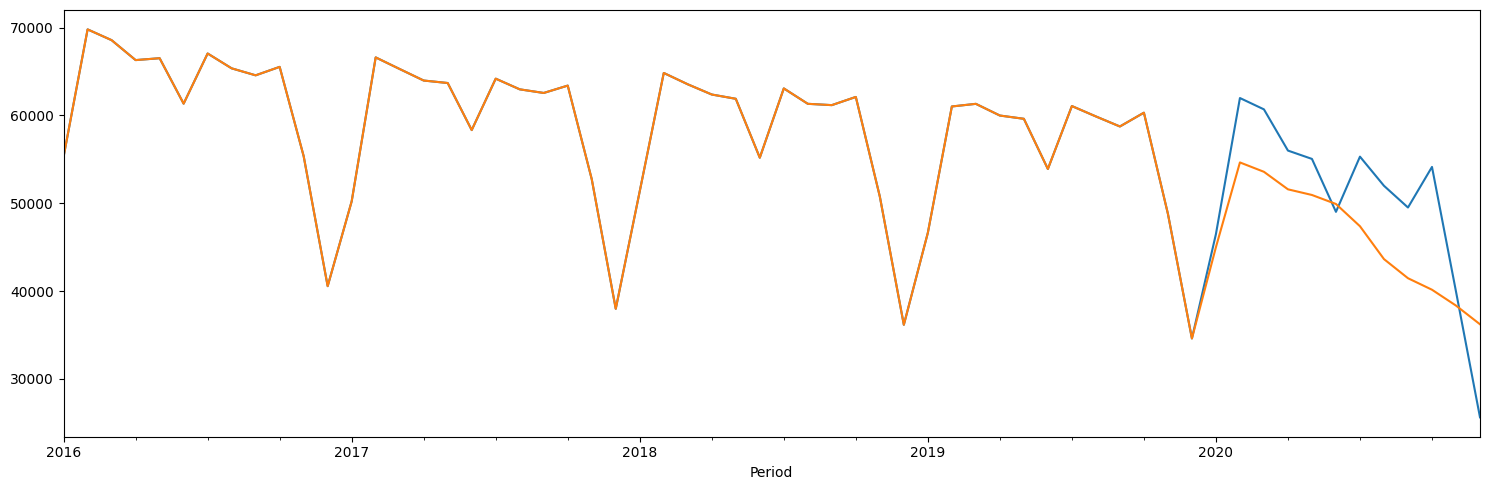

In [1165]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(h*3, h))
final_preds['student_visas'].plot(ax=ax)
df.loc[:'2020', 'student_visas'].plot(ax=ax)
plt.tight_layout()
plt.show()

In [1166]:
(final_preds.loc['2020', 'student_visas'] - df.loc['2020', 'student_visas']).sum()

52895.169353377554

<Axes: >

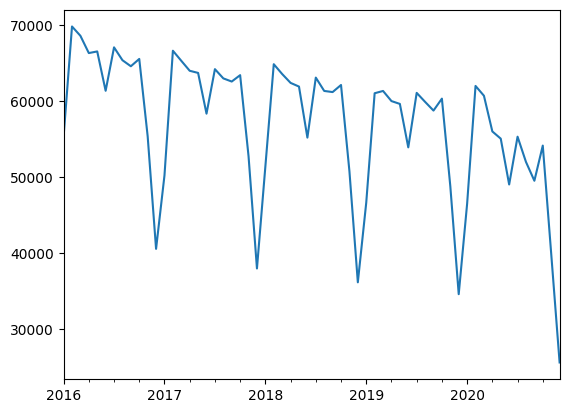

In [1167]:
final_preds['student_visas'].plot()

# Executive Summary

We present a time series analysis on the number of fee-paying foreign students that New Zealand may have lost in 2020. We used numerical data from the StatsNZ COVID-19 data portal which describes the number of fee-paying student visas issued each month, the number of work visas issued per month, the daily number of arrivals at the New Zealand border, and the Activity Index which is a proxy for GDP (an economic indicator). We utilised data between 2016-2019 for most of the analysis, and 2020 for some comparisons. Over this timeframe, there were no missing values.

As the datasets were not in the same frequency (three datasets were monthly, one other was daily), we needed to convert the daily series to monthly. We chose to get the minimum, maximum, mean and total values for border arrivals each month and use these in our analysis. We further note that since we used monthly data between 2016-2019 for analysis, our dataset was small at only 46 rows using 8 variables. This will likely impact the quality of our prediction.

We found that the number of student visas being issued between 2016-2019 were already decreasing year on year by around 30,000 potential students which does not match the trend in work visas which has steadily increased over the same period. 

There were issues we were not able to solve when choosing how far back in time we need to look with our model which may impact the quality of our prediction. Although we did find that most of our variables are related enough to use in forecasting each other using a Vector Autoregression (VAR) model as we used in this project. The Activity Index (economic indicator) was the only time series that was not significantly related to the number of student visas issued.

We utilised a modified version of leave-one-out cross-validation to understand how well the model predicts future values. We obtained two metrics, the root mean squared error (RMSE) which shows error in the same units as the variables themselves and the mean absolute percentage error (MAPE) which shows the average percentage error. Our results indicated weak predictive power with Activity Index having a MAPE of 47%, while our key variable of interest, student visas, had a MAPE of 11% - our minimum target being around 5% or less. Other variables were similar to student visas in terms of error.

Our predictions for 2020 estimate that New Zealand lost around 50,000 foreign, fee-paying students in 2020. Although our 95% prediction interval (@fig-pred-obs) contained most of the observed values of 2020, so unfortunately we cannot rule out that there was no effect from the border closures at all. We believe this is due to low statistical power from a small dataset and the issues we were having around identifying how far back the model can look for insights.

We did not identify any ethical, privacy or security issues during the course of this work.

# Background

New Zealand's higher education institutions face difficult financial circumstances. We need look no further than the last few months where there has been clawbacks of allocated funds from the Tertiary Education Committee, plans to cut staff and calls for reviews of how tertiary institutions are funded. These issues impact universities such as Victoria University of Wellington and vocational training institutes such as Te Pūkenga alike, and are important to understand for conversations related to funding models. Many of these institutions have been dependant on funding from foreign students, which leaves a vulnerability to events such as COVID-19. We seek to better understand this issue.

### The Data
In our project, we are focusing on a time series dataset which is part of Statistics New Zealand's COVID-19 data portal @stats_c19. The specific components of this work are the number of monthly fee-paying student visas issued, the monthly total number of work visas issued, and the number of inbound daily border crossings which StatsNZ has obtained through the Ministry of Business, Innovation and Employment (MBIE) @stats_c19. This data is also available through a Shiny app on MBIE's website @mbie_immi.

The New Zealand Activity Index (NZAC) is the last component of this work and was created in 2020 by the Treasury, but has since been extended to 2004 using historical data @NZAC_tn. This dataset is a monthly index that provides a summary of the eight constituent datasets which include data on: consumer spending, job vacancies, job-seeker numbers, electricity generation, and traffic data from both public and private institutions such as the Ministry of Social Development, ANZ and SEEK @NZAC_tn. This dataset is also available from the COVID-19 data portal @stats_c19.

The NZAC is important as it is released at a higher frequency than most economic datasets. Measures of GDP and the unemployment rate are released quarterly and can be revised for up to 2 years following release. It is well understood in the economics sector that accurate data can carry a 6-to-18-month lag, especially when considering the whole economy @NZAC_tn. These smaller indexes enable a faster release of data that is more up to date. The NZAC is a particularly useful dataset as it aims to reduce the noise that can be present in the component datasets, if they were used alone, and is  highly correlated with Real GDP. This means that it could be useful when making economic forecasts, or when you need to know how the economy was performing before the quarterly GDP updates are released @NZAC_tn. 

We describe the main points of the datasets in @tbl-ds below.

In [1382]:
nice_names = {'total_border':'Total Arrivals',
                'n_days':'Days in Month',
                'mean_border':'Mean Arrivals',
                'min_border':'Minimum Arrivals',
                'max_border':'Maximum Arrivals',
                'activity':'Activity Index',
                'work_visas':'Work Visas',
                'student_visas':'Student Visas'}

In [1495]:
from matplotlib import rc, rcParams

font = {'family' : 'arial',
        'weight' : 'normal',
        'size' : 16}

rcParams['axes.linewidth'] = 1.5
rcParams['lines.linewidth'] = 2
rc('font', **font)
rcParams['legend.fontsize'] = 12

In [1533]:
#| include: True
#| tbl-cap: High-level Dataset Metadata
#| label: tbl-ds

from IPython.display import HTML
HTML(pd.DataFrame({'Dataset':['Student Visas', 'Working Visas', 'Border Crossings', 'NZAC'],
                   'Creator':['MBIE', 'MBIE', 'MBIE', 'Treasury'],
                   'ResourceID':['CPVIS1', 'CPVIS2', 'CPTRA1', 'CPACT12'],
                   'Type':['Fee-paying Student Visas', 'Total Work Visas', 'Total Border Arrivals', 'Activity (NZAC)'],
                    'Frequency':['Monthly', 'Monthly', 'Daily', 'Monthly'],
                    'Start Date':['2015-01-31', '2015-01-31', '2016-01-01', '2004-01-31']
                    }).to_html(index=False))

Dataset,Creator,ResourceID,Type,Frequency,Start Date
Student Visas,MBIE,CPVIS1,Fee-paying Student Visas,Monthly,2015-01-31
Working Visas,MBIE,CPVIS2,Total Work Visas,Monthly,2015-01-31
Border Crossings,MBIE,CPTRA1,Total Border Arrivals,Daily,2016-01-01
NZAC,Treasury,CPACT12,Activity (NZAC),Monthly,2004-01-31


<br>

  
### The Question and Project

The research question for this project was:

* How many fee-paying foreign students did New Zealand lose in 2020 due to border closures?

We thought this was interesting question as it involves the prediction of what might have happened to the number of fee-paying student visas issued if COVID-19 did not occur. This kinda of predictive analysis is fairly tricky, especially as many of the datasets may not provide perfect information about student visas, or about each other.

With this information we should be able to estimate how many fee-paying student visas would have been issued, and compare this to the actual number - this may be a useful figure for decision and policy makers to use in funding applications and decisions, as well as highlight the impact that foreign students have on university finances in New Zealand.

# Data Description and Exploration

In [1497]:
# #| include: True

# # numbering and caption [[]]
# # input data table

# HTML(pd.DataFrame({'Dataset':['Student Visas', 'Working Visas', 'Border Arrivals', 'NZAC'],
#                    'ResourceID':['CPVIS1', 'CPVIS2', 'CPTRA1', 'CPACT12'],
#                    'Type':['Fee-paying Student Visas', 'Total Work Visas', 'Total Border Arrivals', 'Activity (NZAC)'],
#                    'Frequency':['Monthly', 'Monthly', 'Daily', 'Monthly'],
#                    'Minimum':[round(stu_df.describe().loc['min'],0)[0], 
#                               round(work_df.describe().loc['min'],0)[0],
#                               round(border_df_daily.describe().loc['min'],0)[0],
#                               round(activ_df.describe().loc['min'],2)[0]],
#                     'Median':[round(stu_df.describe().loc['50%'],0)[0], 
#                               round(work_df.describe().loc['50%'],0)[0],
#                               round(border_df_daily.describe().loc['50%'],0)[0],
#                               round(activ_df.describe().loc['50%'],2)[0]],
#                     'Maximum':[round(stu_df.describe().loc['max'],0)[0], 
#                               round(work_df.describe().loc['max'],0)[0],
#                               round(border_df_daily.describe().loc['max'],0)[0],
#                               round(activ_df.describe().loc['max'],2)[0]]}).to_html(index=False))

### Timescale Issues
As the total border arrivals dataset was daily data, and the others were monthly, we needed to deal with this somehow. We opted to downsample the daily data to monthly - taking each of the sum, mean, min, max values as well as the number of days in each month. We note that this may give rise to multicollearity concerns which we will address later.

Once we had the data aggregated, we simply joined all four datasets on the relevant time indicies.

### Data Completeness
The four datasets we picked for this project cover different periods - Student and Working Visa datasets were available from 2015, while the NZAC was available from 2004 onwards. However, the Border Arrivals dataset was only available from 2016 and the period of interest is from the start of 2020.

This leaves us with an interesting problem. We need to filter the datasets so we have real values for all of them - this leads us to filter out all of the data prior to 2016, and after 2019 (as we don't want data leakage from the COVID-era).

Within this interval, we had no missing data in these datasets. This resulted in the final, merged and filtered dataset having a final size of 46 rows with 8 columns, ranging from 2016 through to the end of 2019.

### Variable Descriptions
* Total Arrivals is an integer variable that shows the sum of border arrivals in that month.
* Mean Border Arrivals is a float variable showing the mean border arrivals in that month.
* Min Border Arrivals is an integer variable that shows the minimum number of daily border arrivals in that month.

<br>


* Max Border Arrivals is an integer variable that shows the maximum number of daily border arrivals in that month.
* Days in Month is an integer variable that shows how many days were in the month.
* Activity index (NZAC) is a float variable that acts as a proxy measure for economic activity (similar to GDP).
* Work Visas is an integer variable that shows the total number of work visas issued in that month.
* Student Visas is an integer variable that shows the total number of fee-paying student visas issued in that month.

### Component Datasets

@fig-var-lines below shows the different constituents of the final dataset between 2016 and 2020 (inclusive).

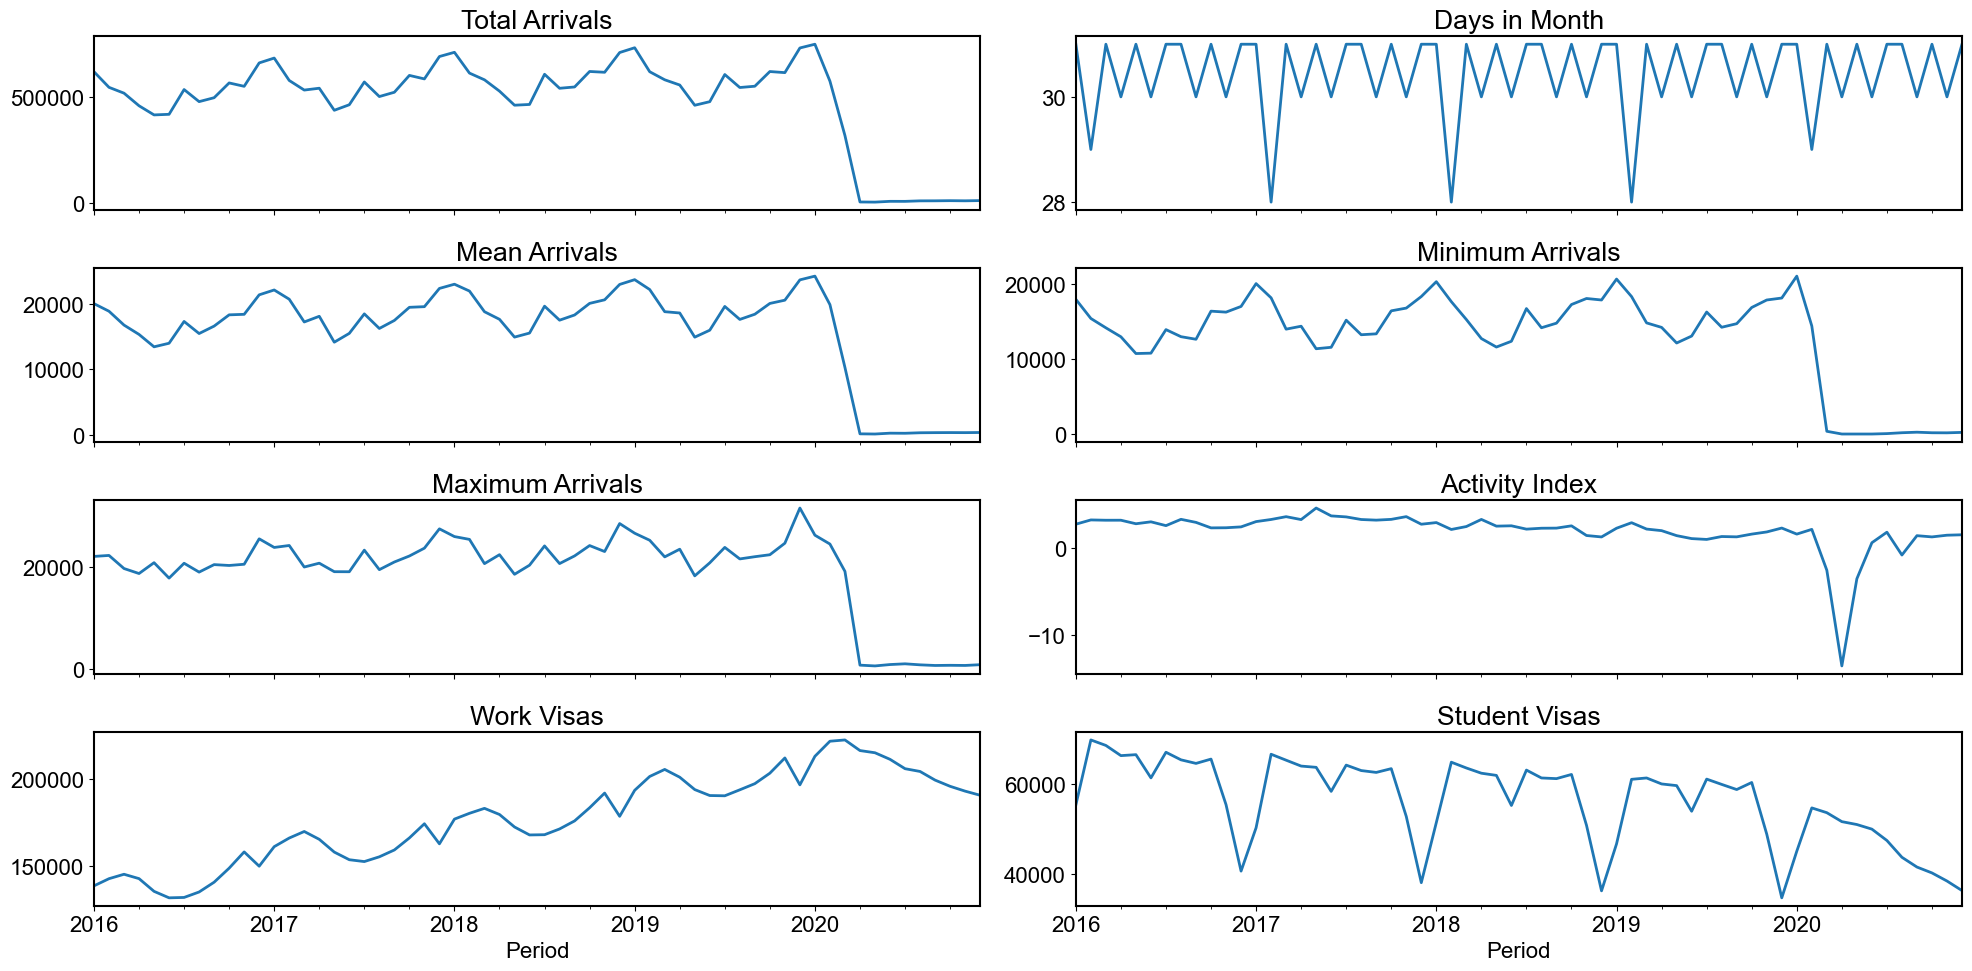

In [1510]:
#| include: True
#| label: fig-var-lines
#| fig-cap: Selected Variables over Time (2016 - 2020)

# y axis and overall font size [[]]

h=10
counter = 0
f, ax = plt.subplots(nrows=4, ncols=2, 
                     figsize=(h*2, h),
                     sharex=True)
ax = ax.ravel()
df_nice = df.rename(nice_names, axis=1)
for col in df_nice.columns:
    df_nice.loc['2016':'2020', col].plot(ax=ax[counter])
    ax[counter].set_title(f"{col}")
    counter += 1
plt.tight_layout()
plt.show()

* Total Arrivals shows a seasonal pattern which peaks in January/December and has a trough in May/June, which makes sense as summer months may be more desirable compared to the colder months. We also see a step decline to zero in 2020.
* Days in Month variable simply follows the number of days in the month, which is shown here.
* Mean Arrivals shows a similar pattern to Total Arrivals.
* Minimum Arrivals shows a similar pattern to Total Arrivals.
* Maximum Arrivals shows a similar, but more spiky pattern to Total Arrivals. It appears that the exact value of this may be a bit more random.
* Activity Index shows a relatively stable time-series with a relatively large, sharp decrease in 2020 before a rebound towards more standard values. Note the slight downwards trend over this timeframe.
* Work Visas also show a seasonal pattern, with a strong upwards trend over all. There was a modest decrease from early 2020.
* Student Visas show seasonal patterns with a trough at the end of the year, which makes sense as students would likely need to apply much earlier than this for international study. We see a general downward trend over this timeframe, which is exacerbated by a strong decrease in 2020.

<br>

The border closures in 2020 clearly had an impact on these datasets, along with many others. We will investigate this further, with a focus on Student Visas. We will start with a seasonal decomposition.

### Seasonal Decomposition

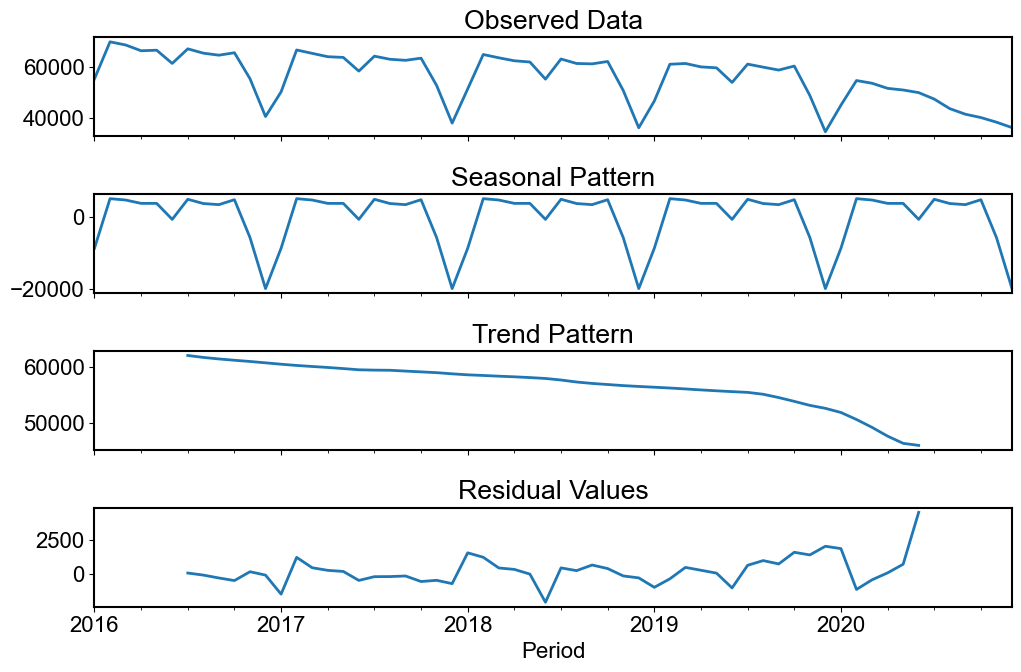

In [1499]:
#| include: True
#| label: fig-season
#| fig-cap: Seasonal Decomposition of Issued Student Visas (2016-2020)

from statsmodels.tsa.seasonal import seasonal_decompose as season

h_season = 7
f_season, ax_season = plt.subplots(nrows=4, ncols=1, 
                     figsize=(h_season*1.5, h_season),
                     sharex=True)
seasonal_decomp = season(df.loc['2016':'2020', 'student_visas'])
ax_season[0].set_title('Observed Data')
ax_season[1].set_title('Seasonal Pattern')
ax_season[2].set_title('Trend Pattern')
ax_season[3].set_title('Residual Values')
seasonal_decomp.observed.plot(ax=ax_season[0])
seasonal_decomp.seasonal.plot(ax=ax_season[1])
seasonal_decomp.trend.plot(ax=ax_season[2])
seasonal_decomp.resid.plot(ax=ax_season[3])
plt.tight_layout()
plt.show()

The seasonal decomposition shown in @fig-season above, reinforces how seasonal Student Visa approvals are.

* The seasonal pattern itself varies from roughly +5,000 throughout most of the year, through to roughly -20,000 in the later stages.
* The trend is more concerning for New Zealand Universities. We see the trend decreasing over the entire observed range (which continues to decline after 2020 until very recently into 2023 [not shown]). The trend appears to be the major contributor to the number of student visas, and orders between 50,000 to 60,000 in the date range shown.
* The residuals appear to be fairly small. They appear to be random and range between -2,000 and +2,000 with a center of 0. We note a slight change in residuals coming into 2020, which is to be expected.

From this, it seems likely that New Zealand Universities will need to either adapt to less foreign student income, or identify new ways to attract more foreign students. We would imagine that these thoughts are already well advanced at the current time.

In [1500]:
# #| include: True

# # number and caption [[]]
# # think about dropping first decimal via pd style formatter?
# df_rep = df.copy()
# df_rep['mean_border'] = round(df_rep['mean_border'], 0)
# HTML(df_rep.rename(nice_names, axis=1).reset_index().head(3).to_html(index=False))

We also want to know how different variables correlate with Student Visas, if we are to predict them. @fig-work-student below shows work and student visas. We note that these both have strong seasonal patterns, but the trend between them is quite different as work visas are strongly increasing up until 2020 while in the mean time, student visas were marginally declining. Although up until 2020, these patterns appeared stable.

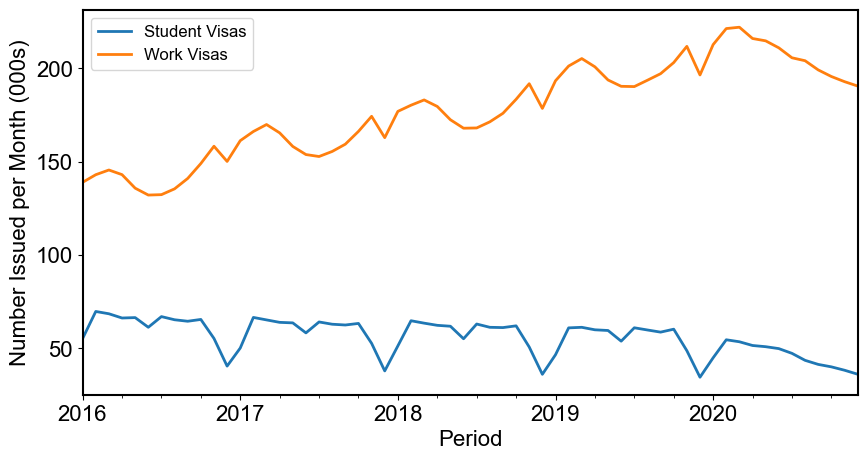

In [1501]:
#| include: True
#| fig-cap: Number of Work and Student Visas Issued per Month (2016-2020)
#| label: fig-work-student

f_student_work, ax_student_work = plt.subplots(1, 1, figsize=(10,5))
(df.loc['2016':'2020', ['student_visas', 'work_visas']]/1000).rename(nice_names, axis=1).plot(ax=ax_student_work)
plt.ylabel('Number Issued per Month (000s)')
plt.show()

# Ethics, Privacy and Security

### Ethics
The dataset is produced by the MBIE and the Treasury and then published as part of the Statistics New Zealand COVID-19 data portal. This data is made available under the [Crown Copyright, Attribution 4.0 International (CC BY 4.0)](https://www.treasury.govt.nz/publications/nzac/nzac-qa-note) license which allows free use, adaptation and distribution of the data as long as the source is attributed, and a link to the license is provided (see earlier in the sentence).

The three datasets from MBIE were all a result of their direct measurement, and there do not appear to be any license details on their website @mbie_immi. 

The NZAC dataset is derived from constituent datasets that are also publicly available as either full datasets, or as data products. As far as we can tell, none of these datasets have licensing at all - although we believe it is reasonable to expect that Treasury has permission to utilise these datasets and publicly release their derivative product under their own license, which we will respect in using this data.

We also believe that all of these datasets was collected with informed consent (as it was mostly either measured values, or through a survey response) and we *assume* that this usage of the data falls within the original bounds of the consent (although this data may have also been obtained through lawful compulsion through the Data and Statistics Act).

The datasets have clear ownership, licensing/terms of use, and transparency of where the data came from. As long as we adhere to the terms of the license, it seems difficult to identify any ethical issues in the use of this dataset.

### Privacy
The MBIE datasets are a result of direct measurements with aggregation and obfuscation measures @mbie_immi. It seems difficult to identify any potential privacy issues with the use of this data.

The NZAC dataset is a series of monthly values which is a combination of multiple datasets. We note that some of the constituent datasets are derived from surveys which may have individual-level, identifying data (although we have not seen these datasets publicly available - these are more likely to be seen as data products). As the final, available data is tightly aggregated, we do not see any potential for de-anonymisation or risk of identifying data being released.

Based on the above, we do not believe there to be any obvious privacy issues with these datasets.

### Security
In uploading/updating the dataset on the appropriate website, the organisation needs to ensure that only the necessary people have the ability to access and modify these files. This is an access control mechanism to limit exposure as to who could potentially upload something malicious, or perhaps more likely, reuse a password and let in a blackhat who may choose to do the same.

We also need to be mindful here that the file itself is the correct one, and not some secret or embargoed data, and that it does not accidentally leak metadata (such as who worked on it, commentary from reviewers, exif data in case of images etc).

When the file has been uploaded, the database or server needs to be well defended to deter opportunistic (or targeted) attacks which may aim to change the file (malware, viruses etc - an integrity issue) or deny access to the file (DDOS - an availability issue). For this, we need a properly configured host, which can be a challenge for some (although hopefully not for either the Reserve Bank or Stats New Zealand).

When a user attempts to access/download the file, we must also ensure the integrity of the data from host to client. There are a few ways of doing this, but the most common would be by employing HTTPS in an attempt to thwart man-in-the-middle attacks. Additionally we might provide encryption, or a verification hash. A user might also elect to use a VPN or TOR-like browser, and a firewall and/or anti-virus. 

In the specific case of this dataset, StatsNZ offers HTTPS by default, although no verification hash we are aware of. It is difficult to know the specifics of their defenses (which is a good thing). The data is provided in a .csv file, which is a fairly safe filetype given it is pure text data (instead of something like a .pdf or office documents which can utilise macros).

We do not observe any particular security issues related to this dataset.

For our project, the main source of security issues would be in the communication and sharing of files between group members. We have set up a Github repository in order to do this sharing. The repository mitigates many of these potential issues that we might otherwise have in sharing files by email or discord. 

<br>

The repository also features strict access controls in the form of a white-list, and Github itself requires authentication to access (usually in the form of a ssh key or personal access token) which disallows contributions from bad actors (excluding anyone working a Github/Microsoft that is). Although, if one was conniving enough, the information contained in the Github repository may allow someone to do some social engineering, although the attacker would likely have to put in a lot of effort into a (very) low value target.

We do not have any specific counter-measures related to our project outside of good internet hygiene (don't go visiting dodgy sites, or clicking on emails from Nigerian royalty), use a firewall and/or anti-virus, knowing who your group members are, and limiting physical access to your devices. For the individual portion of the report, we do not forsee any additional issues arising.

# Methods and Results

### Stationarity
The first step of our analysis was to determine whether our data was stationary, and if not, how many differences would we need to achieve it. We therefore utilised the augmented Dickey-Fuller test, which has the null hypothesis that the data is **not** stationary. In @tbl-diffs below, we performed the augmented Dickey-Fuller test to all of the variables, including without differencing, with one difference and finally, with two differences. The table contains the p-value for the test, with a value of less than 0.05 suggesting that the variable is stationary. Based on the results of the stationarity testing, we opted for two differences.

In [1502]:
#| include: True
#| label: tbl-diffs
#| tbl-cap: Stationarity and differencing as measured by Augmented Dickey-Fuller test.

HTML(dft_df.rename(nice_names).rename({0:'No Differences',
                                  1:'One Difference',
                                  2:'Two differences'}, axis=1).reset_index().rename({'index':'Variables'}, axis=1).to_html(index=False))

Variables,No Differences,One Difference,Two differences
Total Arrivals,0.29189,0.24490,0.00000
Days in Month,0.09044,0.00000,0.00000
Mean Arrivals,0.28806,0.02061,0.00000
Minimum Arrivals,0.54119,0.00000,0.00000
Maximum Arrivals,0.53686,0.00000,0.00000
Activity Index,0.00000,0.00000,0.00000
Work Visas,0.07327,0.54122,0.00031
Student Visas,0.48119,0.77719,0.00000


### Scaling
Next we considered the variables themselves - there is quite a wide range between the Border Arrivals (~100,000s) and the Activity Index (~1s and 10s). This made comparisons and graphing difficult. We therefore employed standardisation to bring all of the differenced values into a similar scale. We include @fig-final-df below to illustrate the twice-differenced, scaled data we used for our analysis.

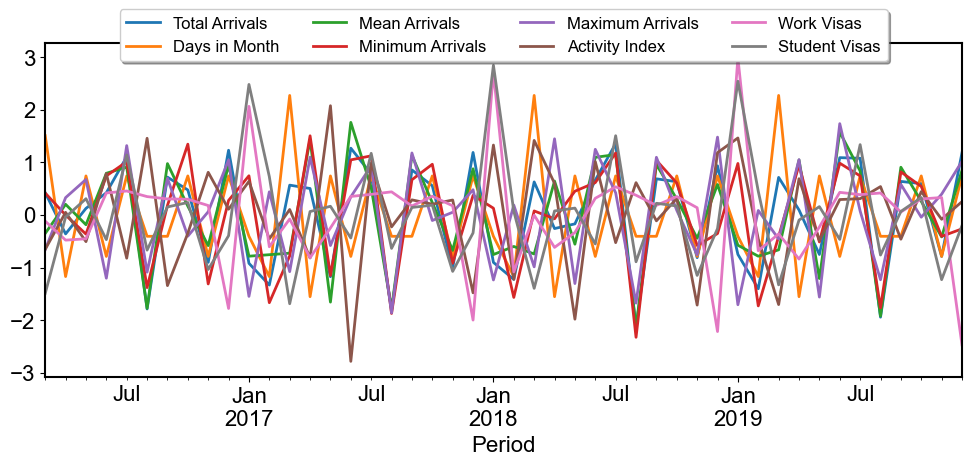

In [1503]:
#| include: True
#| label: fig-final-df
#| fig-cap: Final differenced and scaled dataset

f, ax = plt.subplots(1, 1, figsize=(10, 5))
df2_t.rename(nice_names, axis=1).plot(ax=ax)
ax.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.125), fancybox=True, shadow=True, fontsize=12)
plt.tight_layout()
plt.show()

### Number of Lags
We then needed to look into the optimal number of lags which will inform the modelling process. We started by looking at the autocorrelation function (ACF) and the partial autocorrelation function (PACF) for each variable. Here we will only show the graphs for Student Visas which are illustrated in @fig-acf-pacf below. From this, we can see that the a lag of two may be mildly useful in this case.

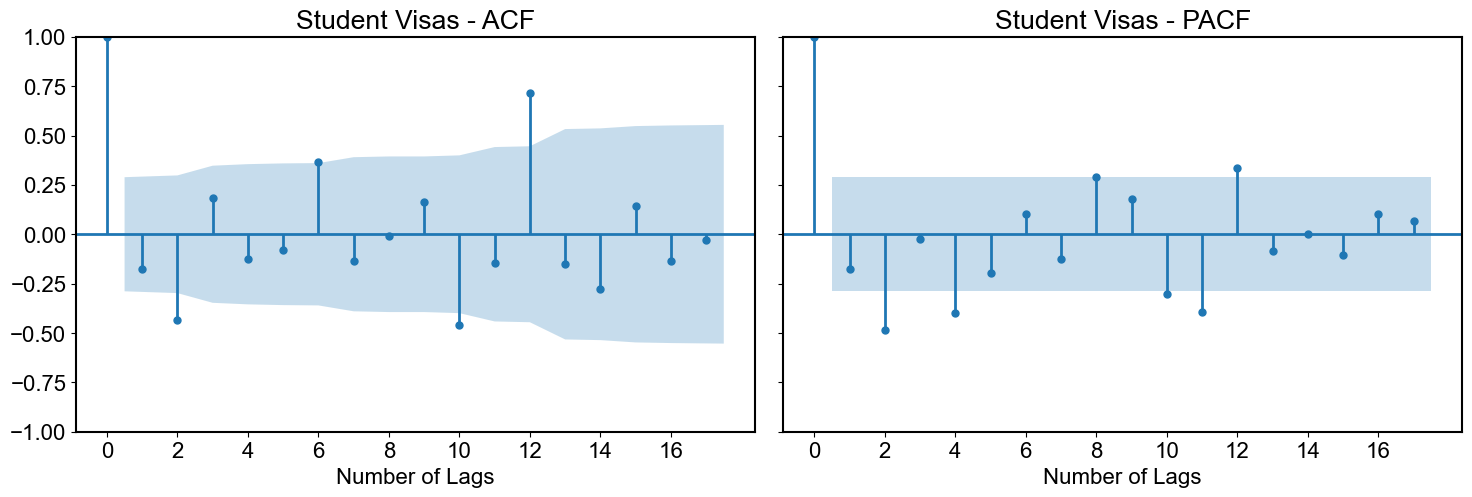

In [1504]:
#| include: True
#| label: fig-acf-pacf
#| fig-cap: Student Visas - ACF and PACF

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
plot_acf(df2_t['student_visas'], ax=ax[0])
ax[0].set_title('Student Visas - ACF')
plot_pacf(df2_t['student_visas'], ax=ax[1])
ax[1].set_title('Student Visas - PACF')
plt.tight_layout()
ax[0].set_xticks(range(0, 18, 2))
ax[0].set_xlabel('Number of Lags')
ax[1].set_xticks(range(0, 18, 2))
ax[1].set_xlabel('Number of Lags')
plt.show()

::: columns
::: {.column width="65%"}
However, when practically putting these variables together, we encounter an issue which limits the number of lags we can utilise. When fitting a test VAR model, we can use the select_order method on the results to determine the optimal number of lags for the model overall by using AIC, BIC, FPE and HQIC, all of which suggest that four lags are best. However, when we look at the results themselves (shown in @tbl-lags), we see a problem at five lags. Our AIC and BIC become negative infinite which suggest an issue which we were not able to solve (the FPE shows positive infinite and HQIC also shows negative infinite [not shown]). 

<br>

We originally believed that this may have been an issue with multicollinearity, but even when removing all except one of the variables derived from border arrivals, the issue remained (but moved to 9 lags instead of 5, although this lead to a decrease in our predictive power compared to having all of the variables available - illustrating our decision to keep the variables in). We believe figuring this issue out may lead to better results as more lags are likely to improve the model. At this point, we selected 4 lags for the model and moved on to the next step.
:::
::: {.column width="3%"}
:::
::: {.column width="32%"}

In [1527]:
#| include: True
#| label: tbl-lags
#| tbl-cap: AIC and BIC per Lag

HTML(lag_df.rename({'aic':'AIC', 
                    'bic':'BIC',
                    'fpe':'FPE',
                    'hqic':'HQIC'}, axis=1).reset_index().rename({'index':'# Lags'}, axis=1).to_html(index=False))


# Lags,AIC,BIC
0,-10.068,-9.75
1,-16.651,-13.76
2,-23.346,-17.831
3,-29.303,-21.112
4,-47.602,-36.679
5,-inf,-inf
6,-520.322,-503.771
7,-523.64,-504.189
8,-517.063,-494.654
9,-511.589,-486.163


:::
:::

### Granger Causality Tests
Now that we have our data prepared, we can also look to see whether the time series we have here are useful in forecasting each other. For this, we've picked the Granger Causality Test, from which we specifically use the SSR-based $\chi^2$ test. For this test, the null hypothesis is that one variable does not cause a significant change in the other up to the specified number of lags (which we used four as stated above). We employ this test in @tbl-granger below, which shows all of the potentially explanatory variables along the columns, along with the potential dependant variables down the rows. The values represent the p-value of the test.

We note that the Activity Index does not appear to be useful in predicting any of the variables other than the Days in the Month. We assumed that this proxy for economic activity may be more useful here, but potentially there aren't enough lags for the effect to come through (or it legitimately may not be useful). We do however see that the Total, Mean and Minimum Arrivals do tend to weakly predict the Activity Index.

All of the other variables have potentially useful predictors, and noteably our overall response variable, Student Visas both predict and are predicted by, most of the variables we have available. Note that we only include one variable for the inbound border arrivals due to space - they mostly follow similarly to the Total Arrivals.

In [1548]:
#| include: True
#| label: tbl-granger
#| tbl-cap: Granger Casuality Tests for the Variables
#| tbl-colwidth: 100

granger_matrix2 = round(granger_matrix.rename(nice_names).rename(nice_names, axis=1),3).reset_index().rename({'index':'Variables'}, axis=1)
selected_cols = ['Variables', 'Total Arrivals', 'Activity Index', 'Work Visas', 'Student Visas']

HTML(granger_matrix2.loc[[0,5,6,7], selected_cols].to_html(index=False))

Variables,Total Arrivals,Activity Index,Work Visas,Student Visas
Total Arrivals,1.00,0.114,0.048,0.000
Activity Index,0.02,1.000,0.233,0.272
Work Visas,0.00,0.286,1.000,0.000
Student Visas,0.00,0.452,0.000,1.000


### Cross-Validation
::: columns
::: {.column width="65%"}
At this point, we were reasonably happy with the results. We have prepared our data, identified the number of lags and determined that our variables are related enough for analysis. 
<br>

Now we will fit a VAR model using the 22 data points between 2016-2017 (losing two datapoints to differencing), and from here predict the next value. We used a variation of leave-one-out cross-validation as we then retrained the model using 23 observed data points and predicted the next. We continued this train, predict, train procedure until we had predictions for 2018-2019. This was viable as we did not have much data (given this was monthly data for just a few years).

We obtained the root mean squared error (RMSE) and the mean absolute percentage error (MAPE) for our predictions as we believed these metrics to be particularly useful in this case as the RMSE is on the same scale as our variables, and the MAPE can give us percentage errors (both very useful as our variables are quite different in scale). 
:::
::: {.column width="3%"}
:::
::: {.column width="32%"}
<br>
<br>
<br>

In [1532]:
#| include: True
#| label: tbl-metrics
#| tbl-cap: Cross-validated Error Metrics


HTML(round(preds_metrics, 3).rename(nice_names).reset_index().rename({'index':'Variables'}, axis=1).to_html(index=False))

Variables,RMSE,MAPE
Total Arrivals,70031.827,11.946
Days in Month,1.475,3.648
Mean Arrivals,2013.472,10.304
Minimum Arrivals,1598.729,9.770
Maximum Arrivals,5492.621,16.020
Activity Index,2.224,47.272
Work Visas,25079.080,12.171
Student Visas,7071.016,11.049


:::
:::

We show our cross-validated error metrics in @tbl-metrics. We note a particularly poor accuracy prediction for the Activity Index, with a MAPE of 47%. Ideally we would want these to be below at least 5% as a benchmark. For Student Visas, we have a MAPE of 11% and a RMSE of ~7000. While these errors aren't terrible, they aren't particularly good either. There are improvements that could be made here which we will describe later. For now, we will continue with the analysis, with the caveat that our predictions are not as accurate as we would like them to be.

### Prediction
With that, we continue on to our modelling and prediction. We refit our model with all of the data from 2016-2019 with the aim to predict values for 2020. We then predicted out for the full 12 months.

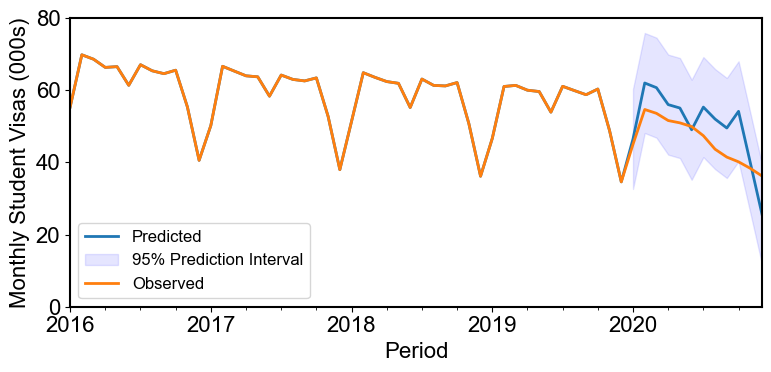

In [1508]:
#| include: True
#| label: fig-pred-obs
#| fig-cap: Observed and Predicted Number of Student Visas Issued by Month

cv_res = df.loc['2018':'2019'] - preds_inv_df
residuals = cv_res['student_visas']
RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
band_size = 1.96*RMSFE/1000

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
(raw_res['student_visas']/1000).plot(ax=ax, label='Predicted')
ax.fill_between(raw_res.loc['2020':].index, 
                (raw_res.loc['2020':, 'student_visas']/1000-band_size), 
                (raw_res.loc['2020':, 'student_visas']/1000+band_size), 
                label = '95% Prediction Interval',
                color='b', 
                alpha=.1)
(raw_comp['student_visas']/1000).plot(ax=ax, label='Observed')
ax.set_ylabel('Monthly Student Visas (000s)', fontsize=16)
ax.set_ylim([0, 80])
plt.legend()
plt.tight_layout()
plt.show()

In [1509]:
#| include: True

from IPython.display import Markdown as md

md(f"""In @fig-pred-obs above, we show our best estimate of the number of student 
   visas which would have been issued if COVID lockdowns did not occur. 
   We note the obvious decrease in the observed values as compared to the prediction. 
   We estimate that New Zealand lost {round((raw_res["student_visas"] - raw_comp["student_visas"]).sum())} 
   potential students in 2020 alone.""")

In @fig-pred-obs above, we show our best estimate of the number of student 
   visas which would have been issued if COVID lockdowns did not occur. 
   We note the obvious decrease in the observed values as compared to the prediction. 
   We estimate that New Zealand lost 52895 
   potential students in 2020 alone.

Our original research question was about finding out how many fee-paying students New Zealand lost in 2020 due to border closures. To formerly answer this, we estimate the loss of approximately 52,895 students, which would be 8% of the total from 2019. We note that these issues also continued on through 2021, although this is not covered in our analysis. The 95% prediction intervals do include almost all of the observed values though, so unfortunately we cannot conclude a significant difference in student visas being issued in 2020 due to border closure at all!!

# Conclusion

We present a time-series analysis to better understand how many fee-paying students were lost due to the border closures in 2020 where we identified our best estimate of 52,895 students being lost to New Zealand in 2020 due to border closures, although we do not have statistical significance with this result.

#### Limitations
* During this work we found that most of the datasets were fit for this purpose, although the Activity Index was not necessary, and may have negatively impacted the analysis. We include this variable as it was a central focus in the group stage of this project, and simply as an interesting additional given that it did not seem to have much interaction. We believed that since it was a proxy for economic activity, that it may have had some influence. It is possible that given a longer lag-time, that there would have been predictive power here, though we cannot be sure.
* The data available to us was monthly data, leading back just four years prior to COVID. Ideally we would have liked more data, and particularly at a finer granularity. Weekly or even daily data may have made our predictions a bit better.
* We had an issue when determining the number of lags to use in the model, which resulted in -infinity AIC and BIC. If we could identify and fix the cause of this issue, we may be able to utilise more lags and get a better model (and predictions).

#### Recommendations
* If this work was to be continued, we would suggest that other datasets be considered for addition to the model. There is a multitude of data which may be useful here such as university rankings of New Zealand universities, or the average cost to international students for different types of study.